## Implementation of Perceptron

In [1]:
# Checking Files and folder

import os

os.getcwd()

'C:\\Users\\Rohan\\oneNeuron'

In [2]:
with open('prac.txt', 'w') as f:
    f.writelines('My practice in Jupyter Notebooks')

In [3]:
# importing required libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import joblib # FOR SAVING MY MODEL AS A BINARY FILE
from matplotlib.colors import ListedColormap
import time

plt.style.use("ggplot") # THIS IS STYLE OF GRAPHS

In [9]:
class ActivationFunction:
    def __init__(self, fn, alpha = None):
        self.fn = fn
        self.alpha = alpha
        
    def step(self, x):
        return np.where(x >= 0, 1, 0)
    
    def signum(self, x):
        return -1 if x < 0 else 0 if x == 0 else 1
    
    def linear(self, x):
        return x
    
    def ReLU(self, x):
        return max(0.0, x)
    
    def sigmoid(self, x):
        return 1/(1 + np.exp(x))
    
    def tan_h(self, x):
        return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))
    
    def ELU(self, x, alpha = 1):
        return x if x >= 0 else alpha*(np.exp(x) - 1)
    
    def GELU(self, x):
        return 0.5*x*(1 + np.tanh((7/11)**.5 * (x + (0.044715 * x**3))))
    
    def swish(self, x):
        return  x/(1 + np.exp(-x))
    
    def call(self):
        funcs = [self.step, self.signum, self.linear, self.ReLU, self.sigmoid, self.tan_h, self.ELU, self.GELU, self.swish]
        func_str = ['step', 'signum', 'linear', 'relu', 'sigmoid', 'tanh', 'elu', 'gelu', 'swish']
        func_dict = dict(zip(func_str, funcs))
        return func_dict[self.fn]

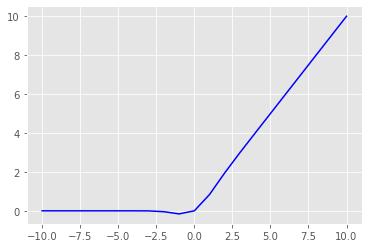

In [10]:
fn = 'gelu'
f = ActivationFunction(fn).call()
inputs = [i for i in range(-10, 11)]
vf = np.vectorize(f)
outputs = vf(inputs) if fn != 'elu' else vf(inputs, 2)
plt.plot(inputs, outputs, color = 'blue')
plt.show()

In [17]:
class Perceptron:
    def __init__(self, eta, epochs):
        self.eta = eta
        self.epochs = epochs
    
    def activationFunction(self, inputs, weights, fnxn, alpha):
        z = np.dot(inputs, weights) # Z = W.X [Matrix Dot products]
        fn = ActivationFunction(fnxn).call()
        vf = np.vectorize(fn)
        outputs = vf(z) if fnxn != 'elu' else vf( z, alpha)
        return outputs
    
    def fit(self, X, y, fn, alpha):
        self.X = X
        self.y = y
        self.funxn = fn
        self.alpha = alpha
        
        X_bias = np.c_[self.X, -np.ones((self.X.shape[0], 1))] # CONCATENATION
        print(f'\nX with bias:\n{X_bias}')
        
        self.weights = np.random.randn(X_bias.shape[-1]) * 1e-4 # SMALL WEIGHT INIT
        print(f"\ninitial weights before training:\n{self.weights}")
        
        for epoch in range(self.epochs):
            print('---'*10)
            print(f'# epoch: {epoch+1}')
            print('---'*10)
            
            y_hat = self.activationFunction(X_bias, self.weights, self.funxn, self.alpha) # FORWARD PROPAGATION
            print(f'Predicted value after forward pass:\n{y_hat}')
            self.error = self.y - y_hat
            print(f'\nError:\n{self.error}')
            self.weights = self.weights + self.eta * np.dot(X_bias.T, self.error) # BACKWARD PROPAGATION
            print(f'\nUpdated weights after epoch:\n{epoch+1}/{self.epochs}:\n{self.weights}')
            print('#####'*10)
            
    def predict(self, X):
        X_bias = np.c_[X, -np.ones((X.shape[0], 1))]
        return self.activationFunction(X_bias, self.weights, self.funxn, self.alpha)
    
    def total_loss(self):
        total_loss = np.sum(self.error)
        print(f'Total Loss: {total_loss}')
        return total_loss

In [18]:
# Utility Functions

def prepare_data(df):
    X = df.drop("y", axis=1)

    y = df["y"]

    return X, y

def save_model(model, filename):
    model_dir = "models"
    os.makedirs(model_dir, exist_ok=True) # ONLY CREATE IF MODEL_DIR DOESN"T EXISTS
    filePath = os.path.join(model_dir, filename) # model/filename
    joblib.dump(model, filePath)
    
def save_plot(df, file_name, plotTitle, model):
    def _create_base_plot(df, plotTitle):
        df.plot(kind="scatter", x="x1", y="x2", title = plotTitle, c="y", s=100, cmap="winter")
        plt.axhline(y=0, color="black", linestyle="--", linewidth=1)
        plt.axvline(x=0, color="black", linestyle="--", linewidth=1)
        figure = plt.gcf() # get current figure
        figure.set_size_inches(20, 15)

    def _plot_decision_regions(X, y, classfier, resolution=0.02):
        colors = ("red", "blue", "lightgreen", "gray", "cyan")
        cmap = ListedColormap(colors[: len(np.unique(y))])

        X = X.values # as a array
        x1 = X[:, 0] 
        x2 = X[:, 1]
        x1_min, x1_max = x1.min() -1 , x1.max() + 1
        x2_min, x2_max = x2.min() -1 , x2.max() + 1

        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), 
                               np.arange(x2_min, x2_max, resolution))
        print(xx1)
        print(xx1.ravel())
        Z = classfier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
        Z = Z.reshape(xx1.shape)
        plt.contourf(xx1, xx2, Z, alpha=0.2, cmap=cmap)
        plt.xlim(xx1.min(), xx1.max())
        plt.ylim(xx2.min(), xx2.max())

        plt.plot()
        plt.show()



    X, y = prepare_data(df)

    _create_base_plot(df, plotTitle)
    _plot_decision_regions(X, y, model)

    plot_dir = "plots"
    os.makedirs(plot_dir, exist_ok=True) # ONLY CREATE IF MODEL_DIR DOESN"T EXISTS
    plotPath = os.path.join(plot_dir, file_name) # model/filename
    plt.savefig(plotPath)
    
def main(data, eta, epochs, fn, filename, plotFilename, plotTitle):

   
    df = pd.DataFrame(data)
    print(df)

    X, y = prepare_data(df)
    

    model = Perceptron(eta = eta, epochs = epochs)
    model.fit(X, y, fn, alpha=None) if fn != 'elu' else model.fit(X, y, fn, alpha=0.2)

    _ = model.total_loss()

    save_model(model, filename = filename)

    save_plot(df, plotFilename, plotTitle, model)
    


   x1  x2  y
0   0   0  0
1   0   1  1
2   1   0  1
3   1   1  1

X with bias:
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]

initial weights before training:
[ 1.02565546e-04 -2.39802213e-05  6.26802544e-05]
------------------------------
# epoch: 1
------------------------------
Predicted value after forward pass:
[0 0 1 1]

Error:
0    0
1    1
2    0
3    0
Name: y, dtype: int64

Updated weights after epoch:
1/20:
[ 1.02565546e-04  2.99976020e-01 -2.99937320e-01]
##################################################
------------------------------
# epoch: 2
------------------------------
Predicted value after forward pass:
[1 1 1 1]

Error:
0   -1
1    0
2    0
3    0
Name: y, dtype: int64

Updated weights after epoch:
2/20:
[1.02565546e-04 2.99976020e-01 6.26802544e-05]
##################################################
------------------------------
# epoch: 3
------------------------------
Predicted value after forward pass:
[0 1 1 1]

Error:
0    0
1    0
2    0
3  

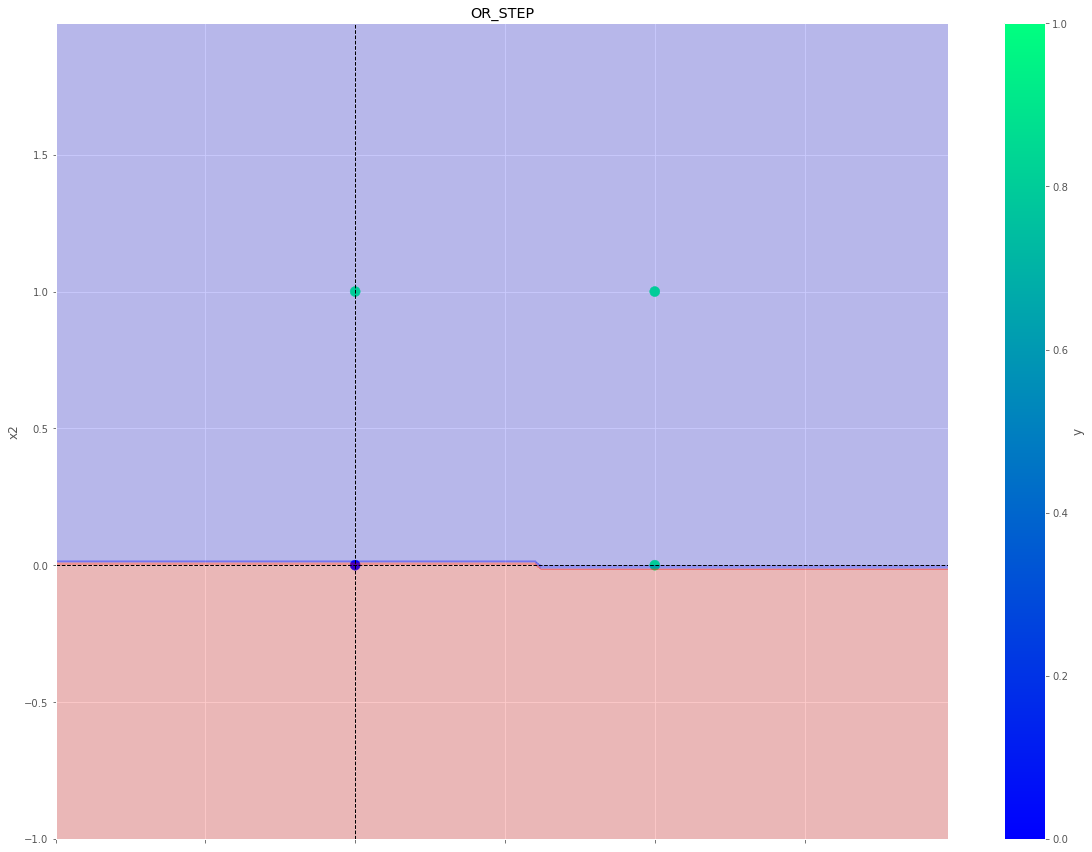

**************************************************************************************************************
                                                OR_STEP Ended                                                 
************************************************************************************************************************
   x1  x2  y
0   0   0  0
1   0   1  0
2   1   0  0
3   1   1  1

X with bias:
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]

initial weights before training:
[ 1.08903285e-04 -5.28234767e-05 -3.20124388e-05]
------------------------------
# epoch: 1
------------------------------
Predicted value after forward pass:
[1 0 1 1]

Error:
0   -1
1    0
2   -1
3    0
Name: y, dtype: int64

Updated weights after epoch:
1/20:
[-2.99891097e-01 -5.28234767e-05  5.99967988e-01]
##################################################
------------------------------
# epoch: 2
------------------------------
Predicted value after forward pass:
[0 0 0 0]


<Figure size 432x288 with 0 Axes>

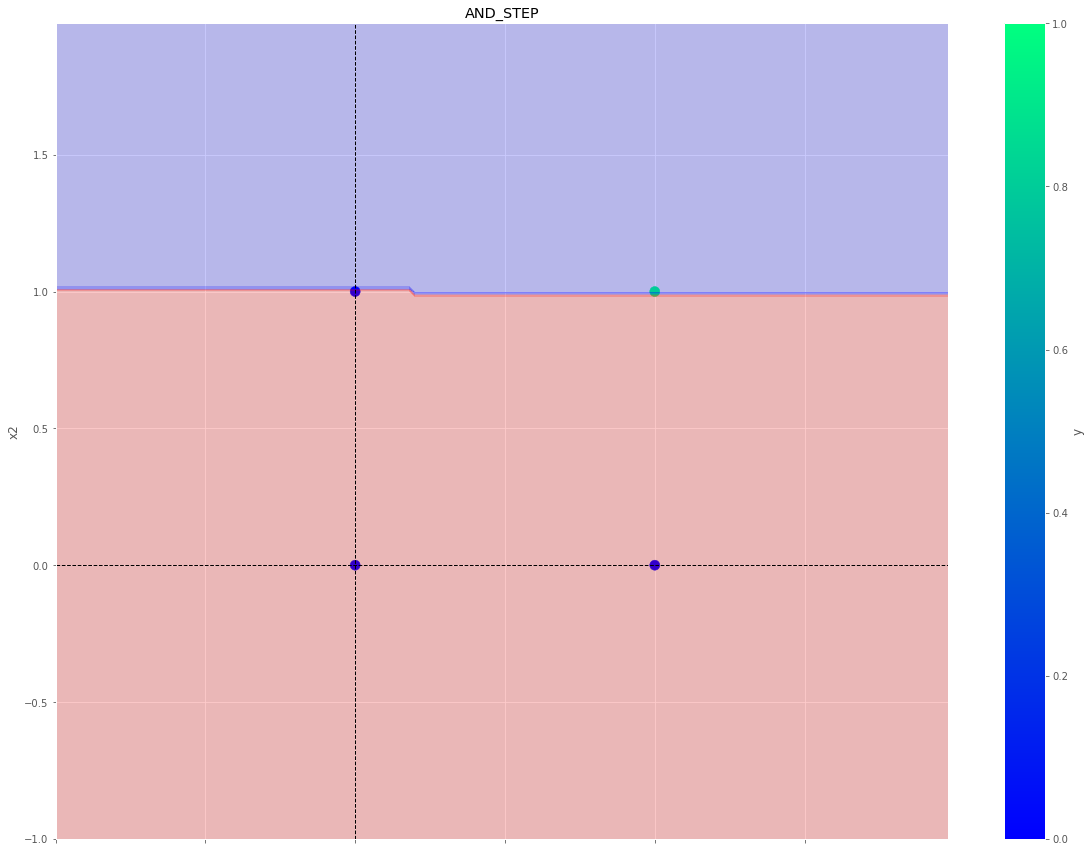

**************************************************************************************************************
                                                AND_STEP Ended                                                
************************************************************************************************************************
   x1  x2  y
0   0   0  0
1   0   1  1
2   1   0  1
3   1   1  0

X with bias:
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]

initial weights before training:
[ 1.32737650e-04  8.80092618e-05 -9.50152969e-05]
------------------------------
# epoch: 1
------------------------------
Predicted value after forward pass:
[1 1 1 1]

Error:
0   -1
1    0
2    0
3   -1
Name: y, dtype: int64

Updated weights after epoch:
1/20:
[-0.29986726 -0.29991199  0.59990498]
##################################################
------------------------------
# epoch: 2
------------------------------
Predicted value after forward pass:
[0 0 0 0]

Error:
0   

<Figure size 432x288 with 0 Axes>

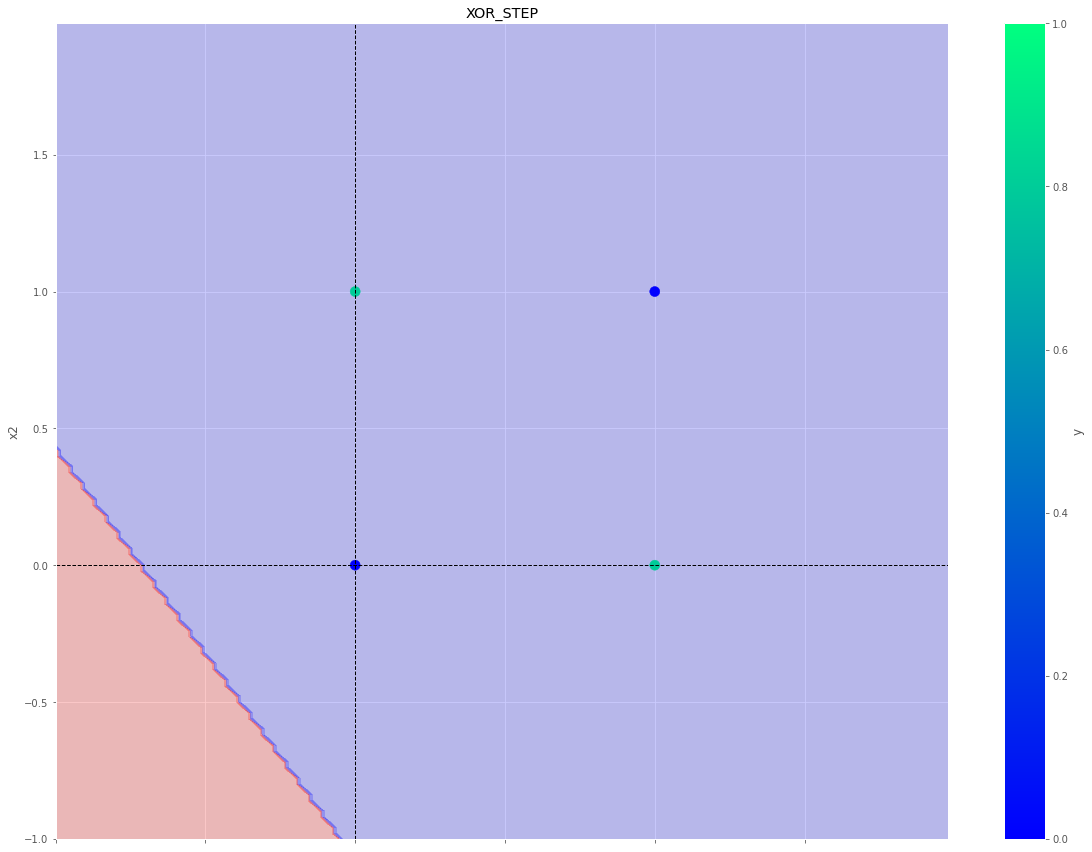

**************************************************************************************************************
                                                XOR_STEP Ended                                                
************************************************************************************************************************
   x1  x2  y
0   0   0  1
1   0   1  1
2   1   0  1
3   1   1  0

X with bias:
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]

initial weights before training:
[-3.36582999e-05 -4.24782451e-05  2.19980574e-05]
------------------------------
# epoch: 1
------------------------------
Predicted value after forward pass:
[0 0 0 0]

Error:
0    1
1    1
2    1
3    0
Name: y, dtype: int64

Updated weights after epoch:
1/20:
[ 0.29996634  0.29995752 -0.899978  ]
##################################################
------------------------------
# epoch: 2
------------------------------
Predicted value after forward pass:
[1 1 1 1]

Error:
0   

<Figure size 432x288 with 0 Axes>

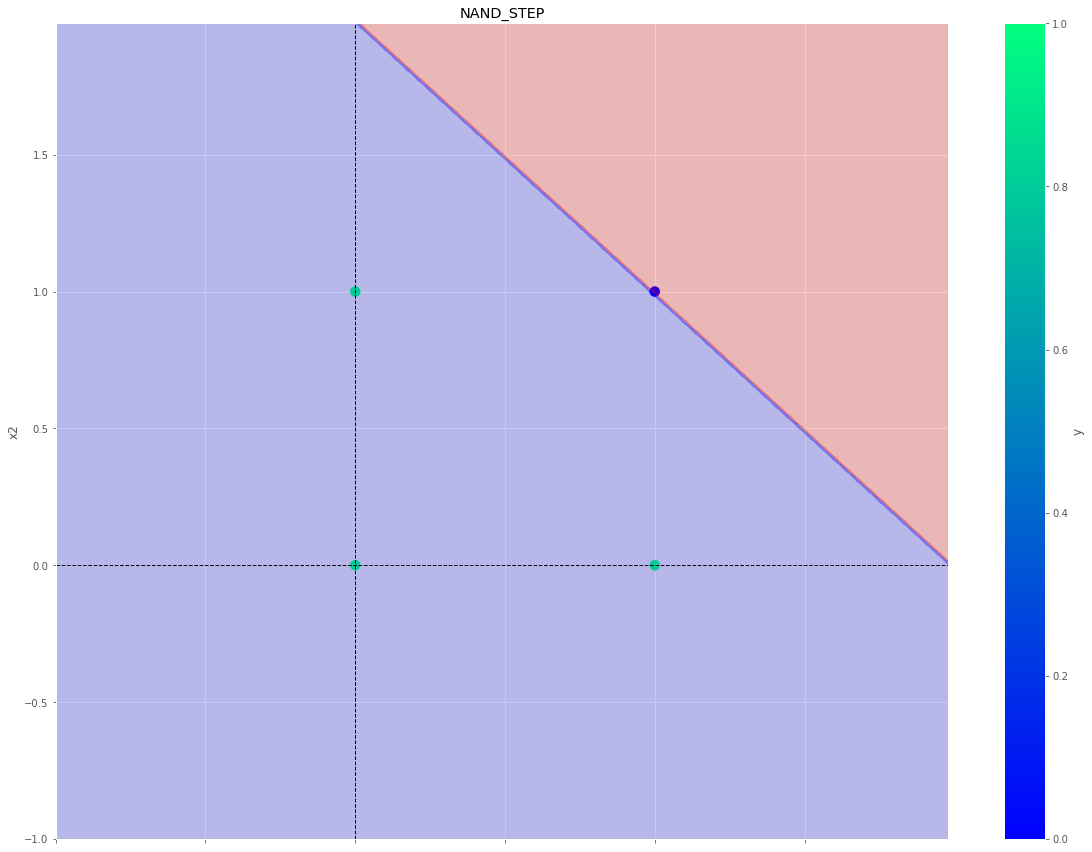

**************************************************************************************************************
                                               NAND_STEP Ended                                                
************************************************************************************************************************
   x1  x2  y
0   0   0  0
1   0   1  1
2   1   0  1
3   1   1  1

X with bias:
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]

initial weights before training:
[1.21287306e-04 9.24715739e-05 1.42666773e-05]
------------------------------
# epoch: 1
------------------------------
Predicted value after forward pass:
[-1  1  1  1]

Error:
0    1
1    0
2    0
3    0
Name: y, dtype: int64

Updated weights after epoch:
1/20:
[ 1.21287306e-04  9.24715739e-05 -2.99985733e-01]
##################################################
------------------------------
# epoch: 2
------------------------------
Predicted value after forward pass:
[1 1 1 1]

<Figure size 432x288 with 0 Axes>

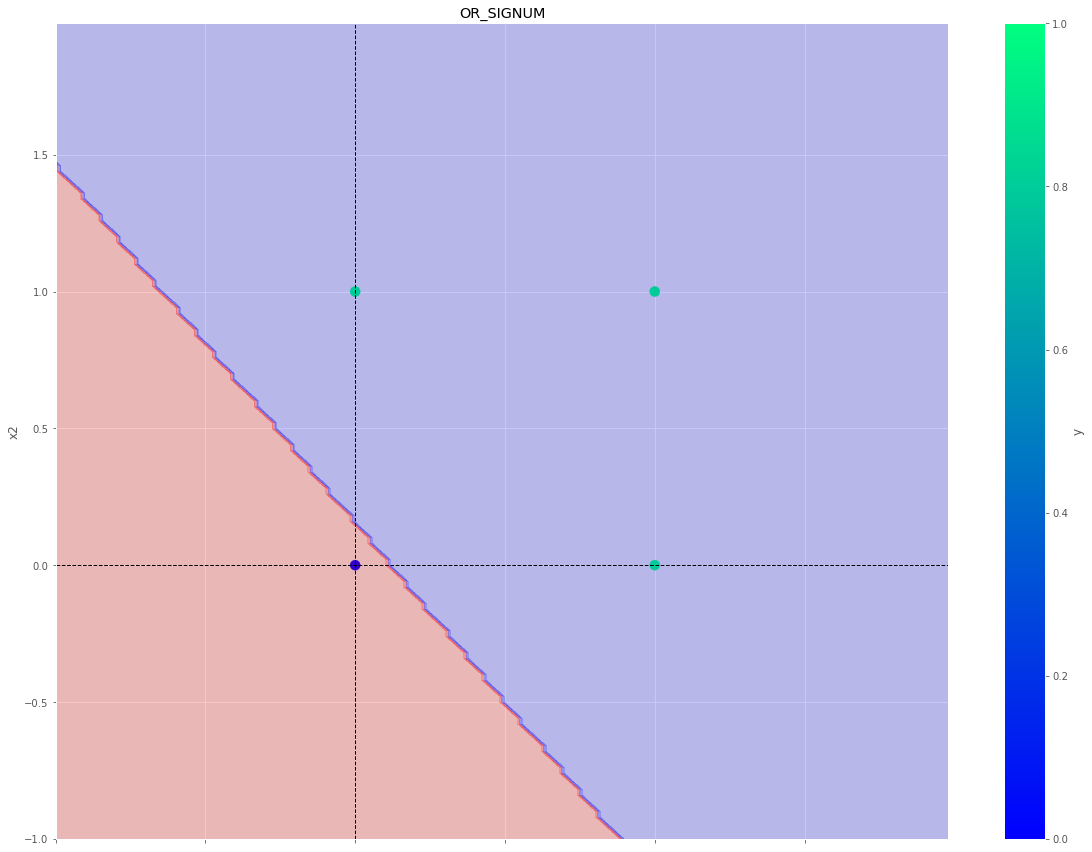

**************************************************************************************************************
                                               OR_SIGNUM Ended                                                
************************************************************************************************************************
   x1  x2  y
0   0   0  0
1   0   1  0
2   1   0  0
3   1   1  1

X with bias:
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]

initial weights before training:
[ 1.62917014e-04 -3.92807566e-05  6.62782806e-05]
------------------------------
# epoch: 1
------------------------------
Predicted value after forward pass:
[-1 -1  1  1]

Error:
0    1
1    1
2   -1
3    0
Name: y, dtype: int64

Updated weights after epoch:
1/20:
[-0.29983708  0.29996072 -0.29993372]
##################################################
------------------------------
# epoch: 2
------------------------------
Predicted value after forward pass:
[1 1 1 1]

Error:


<Figure size 432x288 with 0 Axes>

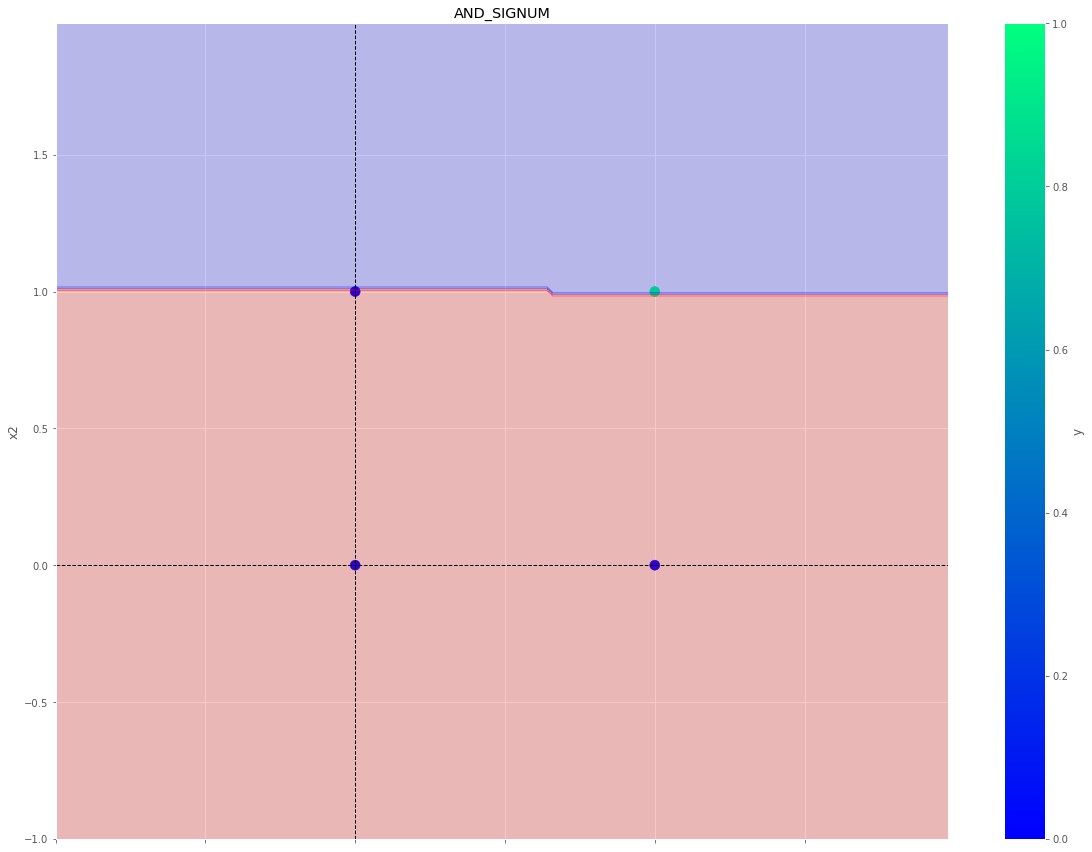

**************************************************************************************************************
                                               AND_SIGNUM Ended                                               
************************************************************************************************************************
   x1  x2  y
0   0   0  0
1   0   1  1
2   1   0  1
3   1   1  0

X with bias:
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]

initial weights before training:
[ 7.64998551e-05  8.03664353e-05 -5.13978700e-05]
------------------------------
# epoch: 1
------------------------------
Predicted value after forward pass:
[1 1 1 1]

Error:
0   -1
1    0
2    0
3   -1
Name: y, dtype: int64

Updated weights after epoch:
1/20:
[-0.2999235  -0.29991963  0.5999486 ]
##################################################
------------------------------
# epoch: 2
------------------------------
Predicted value after forward pass:
[-1 -1 -1 -1]

Error:


<Figure size 432x288 with 0 Axes>

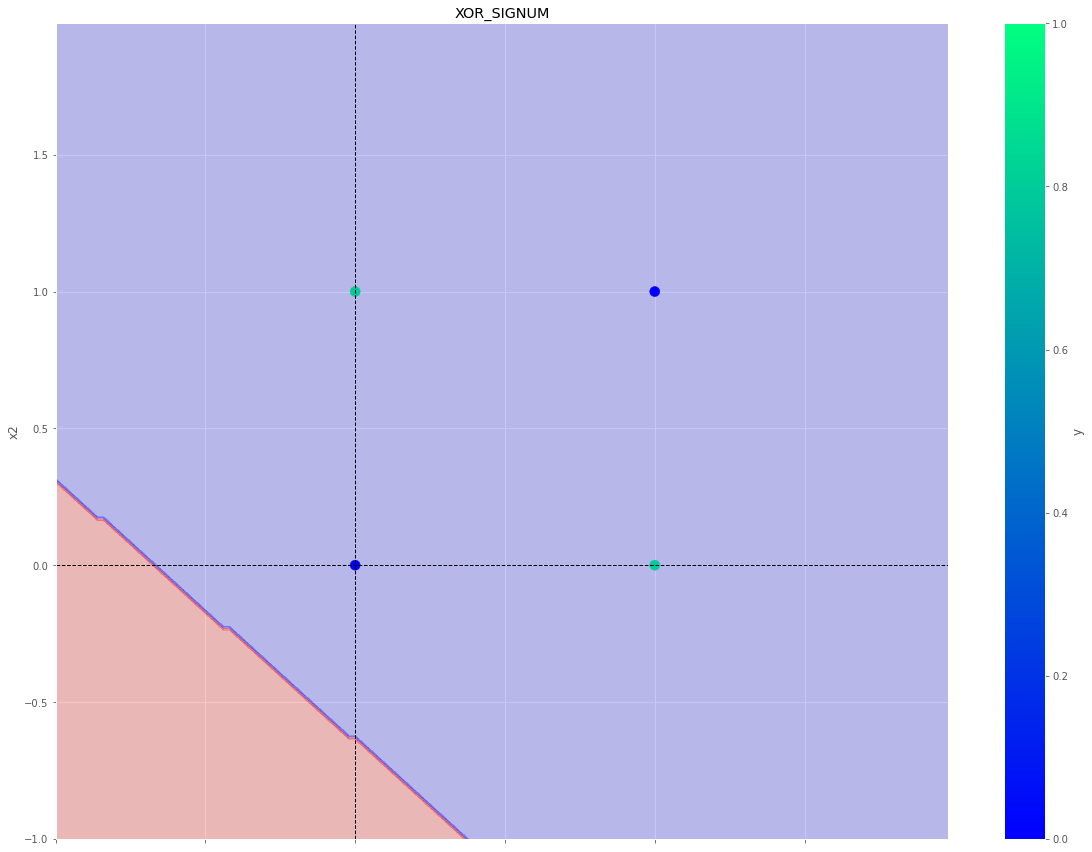

**************************************************************************************************************
                                               XOR_SIGNUM Ended                                               
************************************************************************************************************************
   x1  x2  y
0   0   0  1
1   0   1  1
2   1   0  1
3   1   1  0

X with bias:
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]

initial weights before training:
[-8.71129881e-05 -1.09103083e-04  5.77391879e-05]
------------------------------
# epoch: 1
------------------------------
Predicted value after forward pass:
[-1 -1 -1 -1]

Error:
0    2
1    2
2    2
3    1
Name: y, dtype: int64

Updated weights after epoch:
1/20:
[ 0.89991289  0.8998909  -2.09994226]
##################################################
------------------------------
# epoch: 2
------------------------------
Predicted value after forward pass:
[1 1 1 1]

Error:


<Figure size 432x288 with 0 Axes>

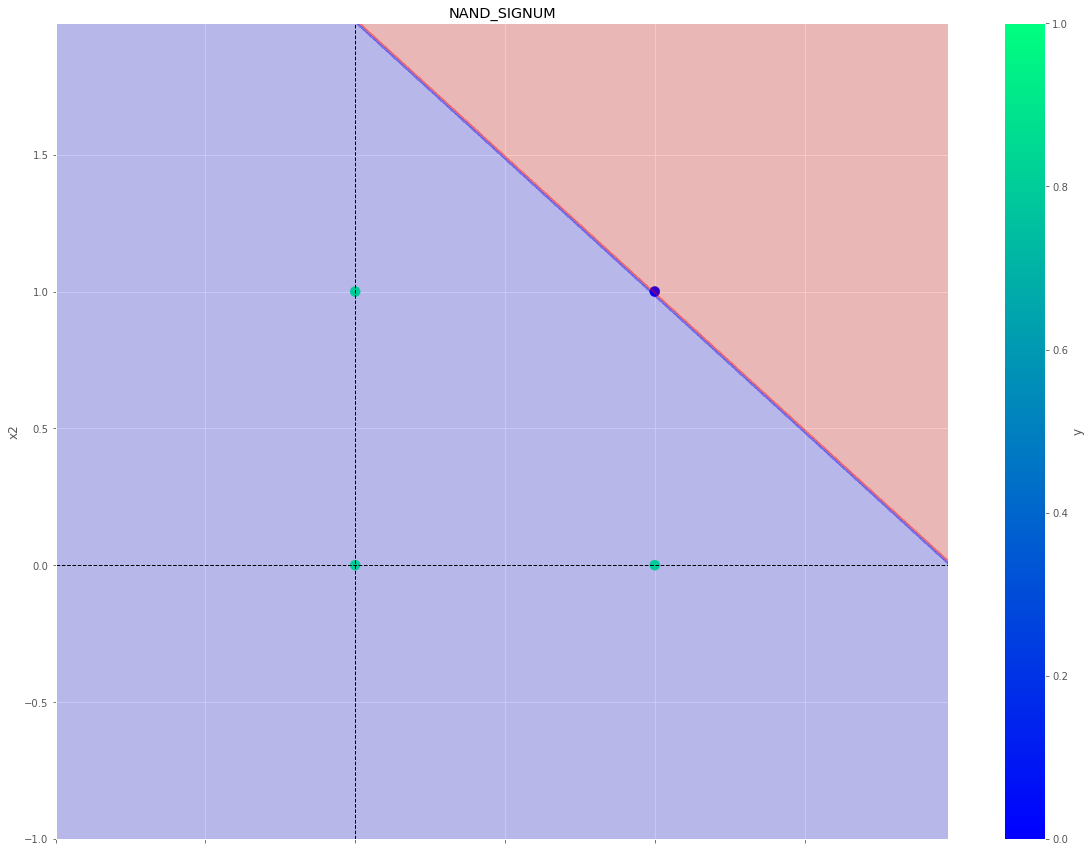

**************************************************************************************************************
                                              NAND_SIGNUM Ended                                               
************************************************************************************************************************
   x1  x2  y
0   0   0  0
1   0   1  1
2   1   0  1
3   1   1  1

X with bias:
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]

initial weights before training:
[-6.31916423e-05  3.72879532e-05  5.68598096e-05]
------------------------------
# epoch: 1
------------------------------
Predicted value after forward pass:
[-5.68598096e-05 -1.95718564e-05 -1.20051452e-04 -8.27634987e-05]

Error:
0    0.000057
1    1.000020
2    1.000120
3    1.000083
Name: y, dtype: float64

Updated weights after epoch:
1/20:
[ 0.59999765  0.60006799 -0.90002691]
##################################################
------------------------------
# epoch: 2
---

<Figure size 432x288 with 0 Axes>

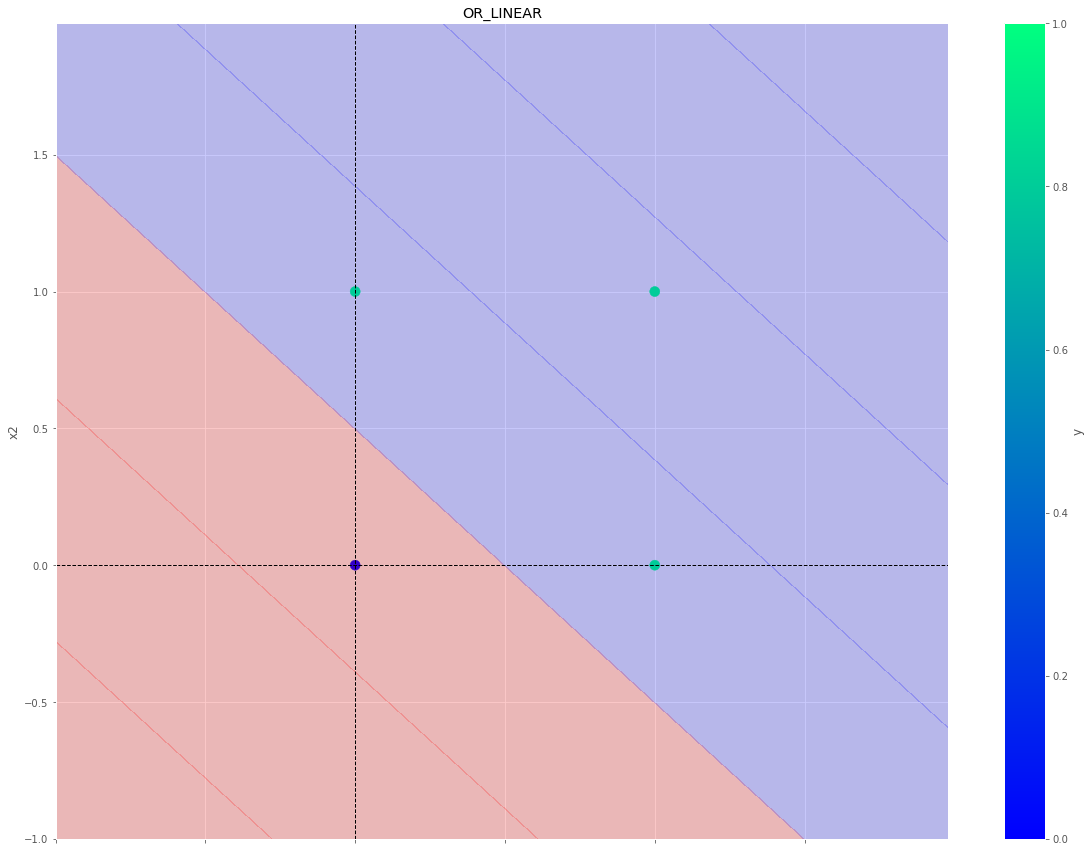

**************************************************************************************************************
                                               OR_LINEAR Ended                                                
************************************************************************************************************************
   x1  x2  y
0   0   0  0
1   0   1  0
2   1   0  0
3   1   1  1

X with bias:
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]

initial weights before training:
[-6.85466211e-07 -5.19188392e-05  8.16223213e-06]
------------------------------
# epoch: 1
------------------------------
Predicted value after forward pass:
[-8.16223213e-06 -6.00810713e-05 -8.84769834e-06 -6.07665375e-05]

Error:
0    0.000008
1    0.000060
2    0.000009
3    1.000061
Name: y, dtype: float64

Updated weights after epoch:
1/20:
[ 0.3000202   0.29998434 -0.3000332 ]
##################################################
------------------------------
# epoch: 2
---

<Figure size 432x288 with 0 Axes>

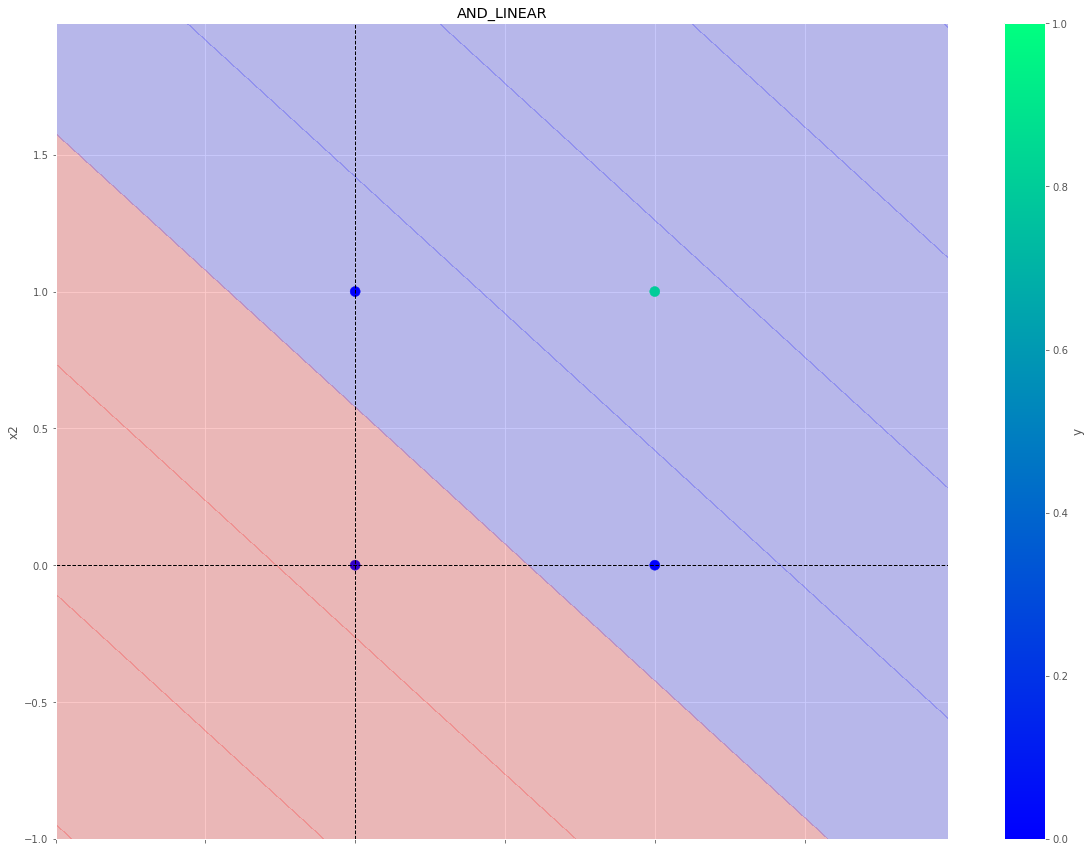

**************************************************************************************************************
                                               AND_LINEAR Ended                                               
************************************************************************************************************************
   x1  x2  y
0   0   0  0
1   0   1  1
2   1   0  1
3   1   1  0

X with bias:
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]

initial weights before training:
[9.15138980e-05 4.46804833e-05 3.82259584e-05]
------------------------------
# epoch: 1
------------------------------
Predicted value after forward pass:
[-3.82259584e-05  6.45452493e-06  5.32879396e-05  9.79684229e-05]

Error:
0    0.000038
1    0.999994
2    0.999947
3   -0.000098
Name: y, dtype: float64

Updated weights after epoch:
1/20:
[ 0.30004614  0.30001335 -0.59992593]
##################################################
------------------------------
# epoch: 2
------

<Figure size 432x288 with 0 Axes>

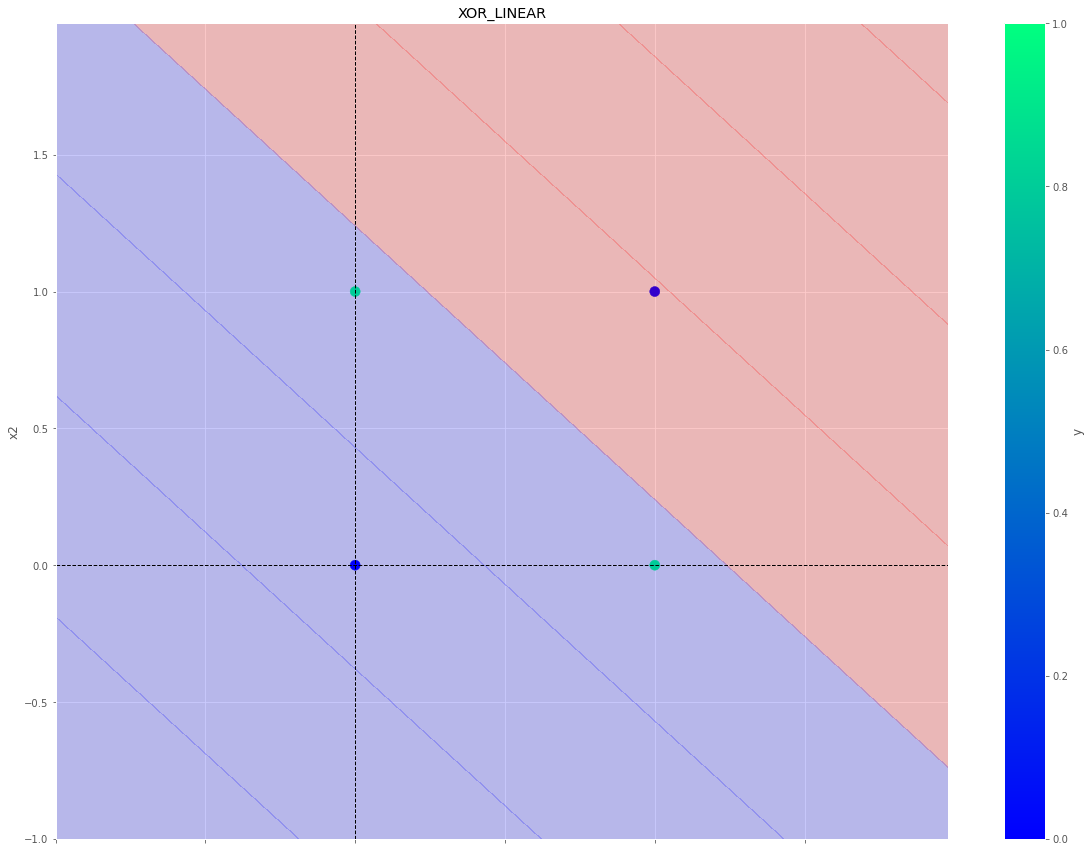

**************************************************************************************************************
                                               XOR_LINEAR Ended                                               
************************************************************************************************************************
   x1  x2  y
0   0   0  1
1   0   1  1
2   1   0  1
3   1   1  0

X with bias:
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]

initial weights before training:
[-6.15371738e-06 -1.25423502e-04 -6.09428501e-05]
------------------------------
# epoch: 1
------------------------------
Predicted value after forward pass:
[ 6.09428501e-05 -6.44806522e-05  5.47891327e-05 -7.06343696e-05]

Error:
0    0.999939
1    1.000064
2    0.999945
3    0.000071
Name: y, dtype: float64

Updated weights after epoch:
1/20:
[ 0.2999986   0.29991511 -0.90006676]
##################################################
------------------------------
# epoch: 2
---

<Figure size 432x288 with 0 Axes>

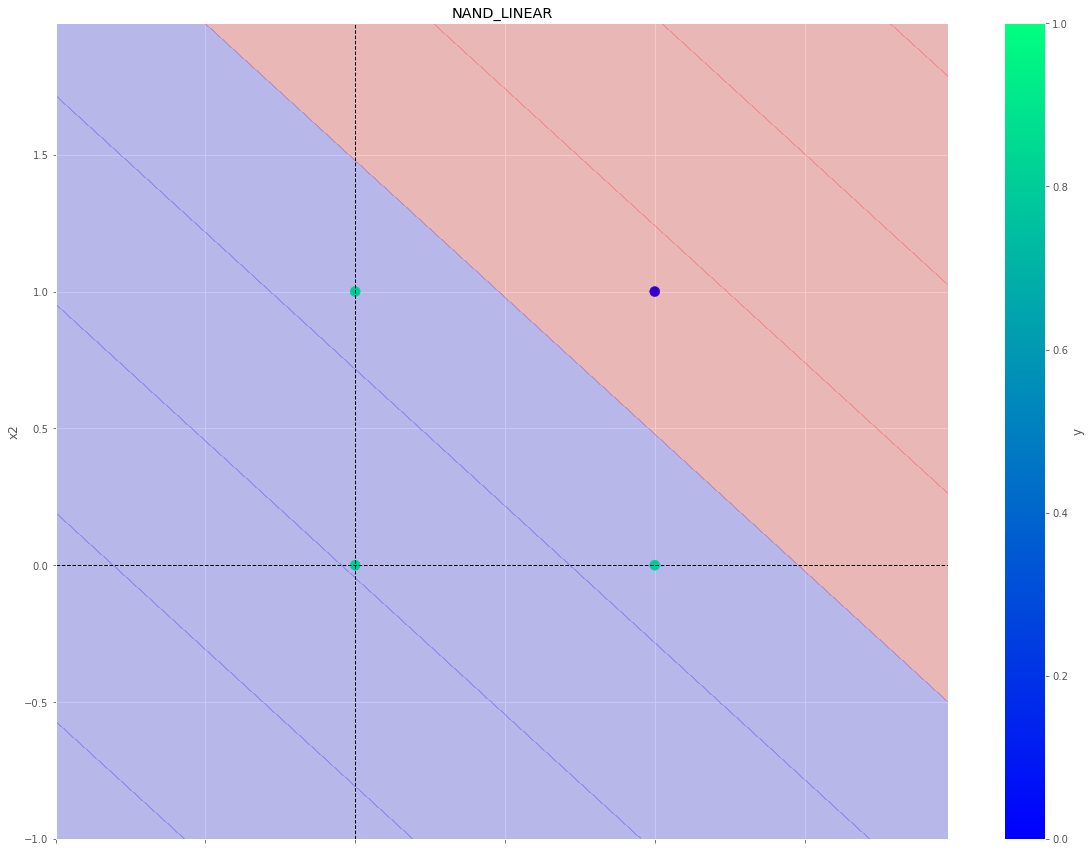

**************************************************************************************************************
                                              NAND_LINEAR Ended                                               
************************************************************************************************************************
   x1  x2  y
0   0   0  0
1   0   1  1
2   1   0  1
3   1   1  1

X with bias:
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]

initial weights before training:
[ 9.68927195e-05  1.66553193e-04 -4.52588287e-05]
------------------------------
# epoch: 1
------------------------------
Predicted value after forward pass:
[4.52588287e-05 2.11812021e-04 1.42151548e-04 3.08704741e-04]

Error:
0   -0.000045
1    0.999788
2    0.999858
3    0.999691
Name: y, dtype: float64

Updated weights after epoch:
1/20:
[ 0.59996164  0.6000104  -0.89983288]
##################################################
------------------------------
# epoch: 2
-------

<Figure size 432x288 with 0 Axes>

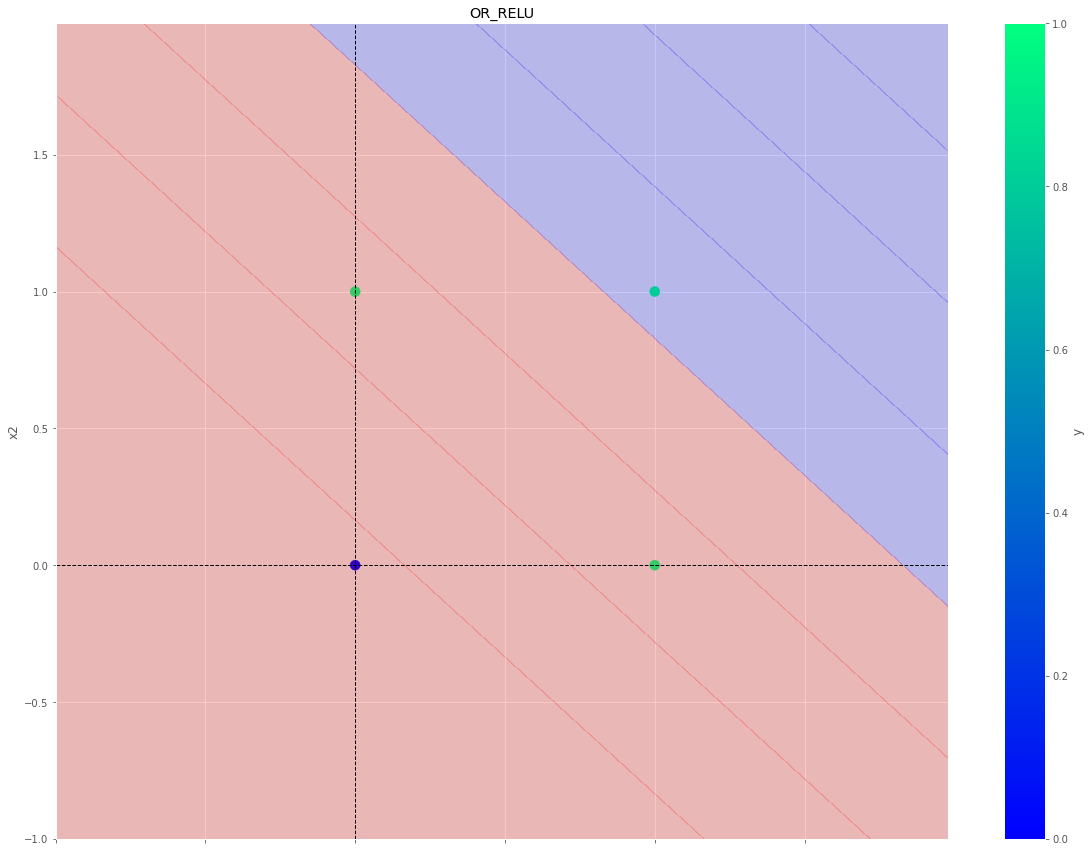

**************************************************************************************************************
                                                OR_RELU Ended                                                 
************************************************************************************************************************
   x1  x2  y
0   0   0  0
1   0   1  0
2   1   0  0
3   1   1  1

X with bias:
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]

initial weights before training:
[-1.05509283e-04 -8.80108925e-05 -2.18578699e-05]
------------------------------
# epoch: 1
------------------------------
Predicted value after forward pass:
[2.18578699e-05 0.00000000e+00 0.00000000e+00 0.00000000e+00]

Error:
0   -0.000022
1    0.000000
2    0.000000
3    1.000000
Name: y, dtype: float64

Updated weights after epoch:
1/20:
[ 0.29989449  0.29991199 -0.3000153 ]
##################################################
------------------------------
# epoch: 2
-------

<Figure size 432x288 with 0 Axes>

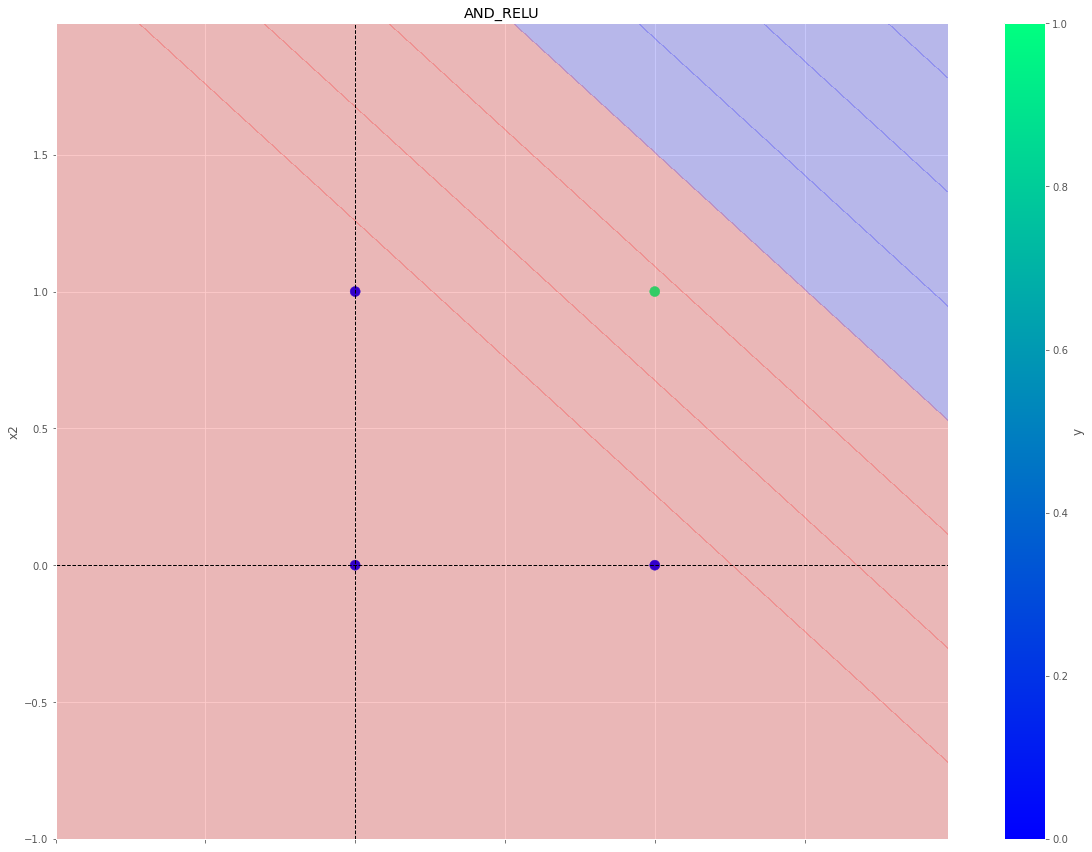

**************************************************************************************************************
                                                AND_RELU Ended                                                
************************************************************************************************************************
   x1  x2  y
0   0   0  0
1   0   1  1
2   1   0  1
3   1   1  0

X with bias:
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]

initial weights before training:
[-2.62445143e-05  5.29067535e-05  7.19489534e-05]
------------------------------
# epoch: 1
------------------------------
Predicted value after forward pass:
[0. 0. 0. 0.]

Error:
0    0.0
1    1.0
2    1.0
3    0.0
Name: y, dtype: float64

Updated weights after epoch:
1/20:
[ 0.29997376  0.30005291 -0.59992805]
##################################################
------------------------------
# epoch: 2
------------------------------
Predicted value after forward pass:
[0.59992

<Figure size 432x288 with 0 Axes>

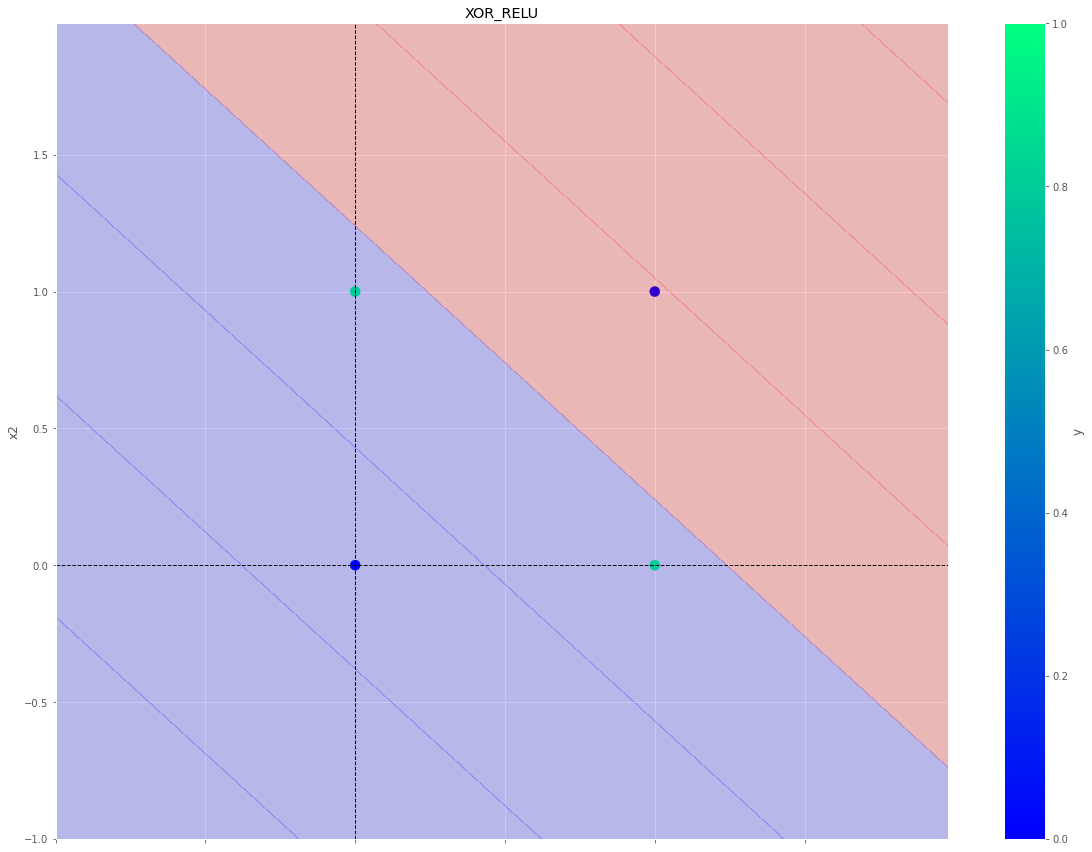

**************************************************************************************************************
                                                XOR_RELU Ended                                                
************************************************************************************************************************
   x1  x2  y
0   0   0  1
1   0   1  1
2   1   0  1
3   1   1  0

X with bias:
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]

initial weights before training:
[ 2.96999591e-05 -1.07576292e-05 -1.23995047e-05]
------------------------------
# epoch: 1
------------------------------
Predicted value after forward pass:
[1.23995047e-05 1.64187552e-06 4.20994638e-05 3.13418347e-05]

Error:
0    0.999988
1    0.999998
2    0.999958
3   -0.000031
Name: y, dtype: float64

Updated weights after epoch:
1/20:
[ 0.30000767  0.29997935 -0.89998615]
##################################################
------------------------------
# epoch: 2
-------

<Figure size 432x288 with 0 Axes>

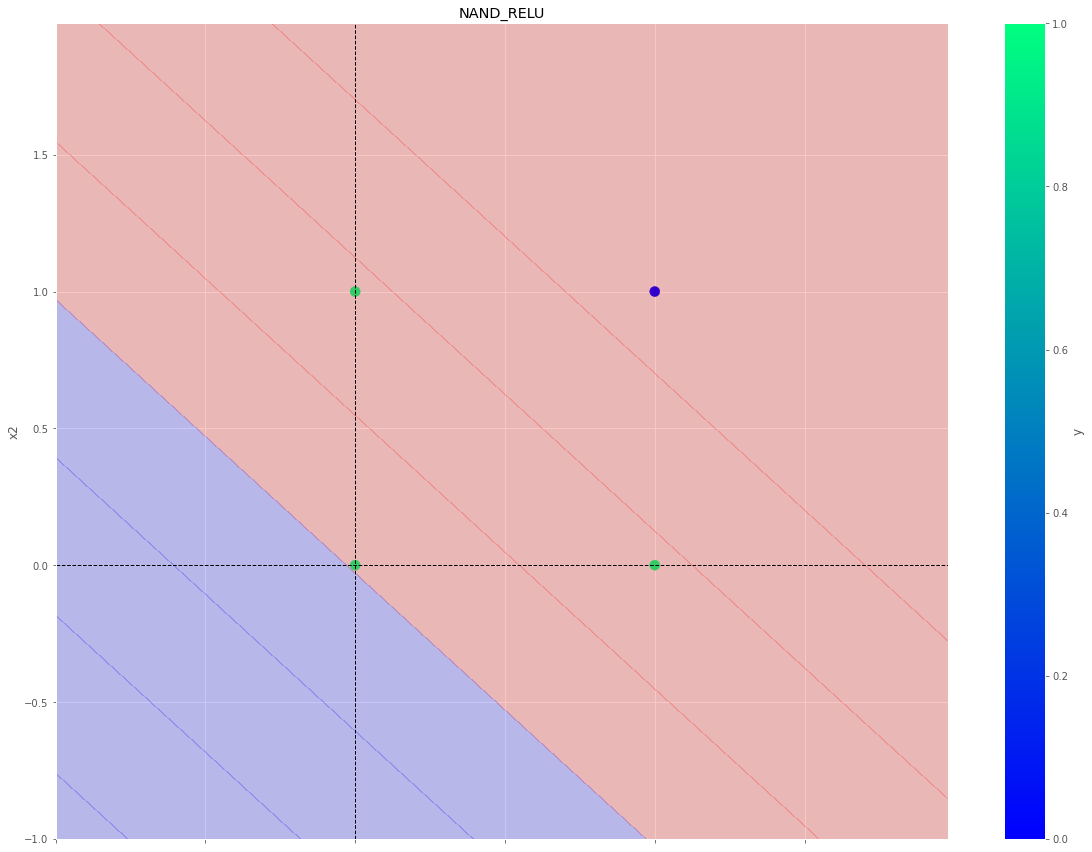

**************************************************************************************************************
                                               NAND_RELU Ended                                                
************************************************************************************************************************
   x1  x2  y
0   0   0  0
1   0   1  1
2   1   0  1
3   1   1  1

X with bias:
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]

initial weights before training:
[9.68907055e-05 1.69984008e-05 4.04187958e-05]
------------------------------
# epoch: 1
------------------------------
Predicted value after forward pass:
[0.5000101  0.50000586 0.49998588 0.49998163]

Error:
0   -0.500010
1    0.499994
2    0.500014
3    0.500018
Name: y, dtype: float64

Updated weights after epoch:
1/20:
[ 0.30010664  0.30002075 -0.29996454]
##################################################
------------------------------
# epoch: 2
--------------------------

<Figure size 432x288 with 0 Axes>

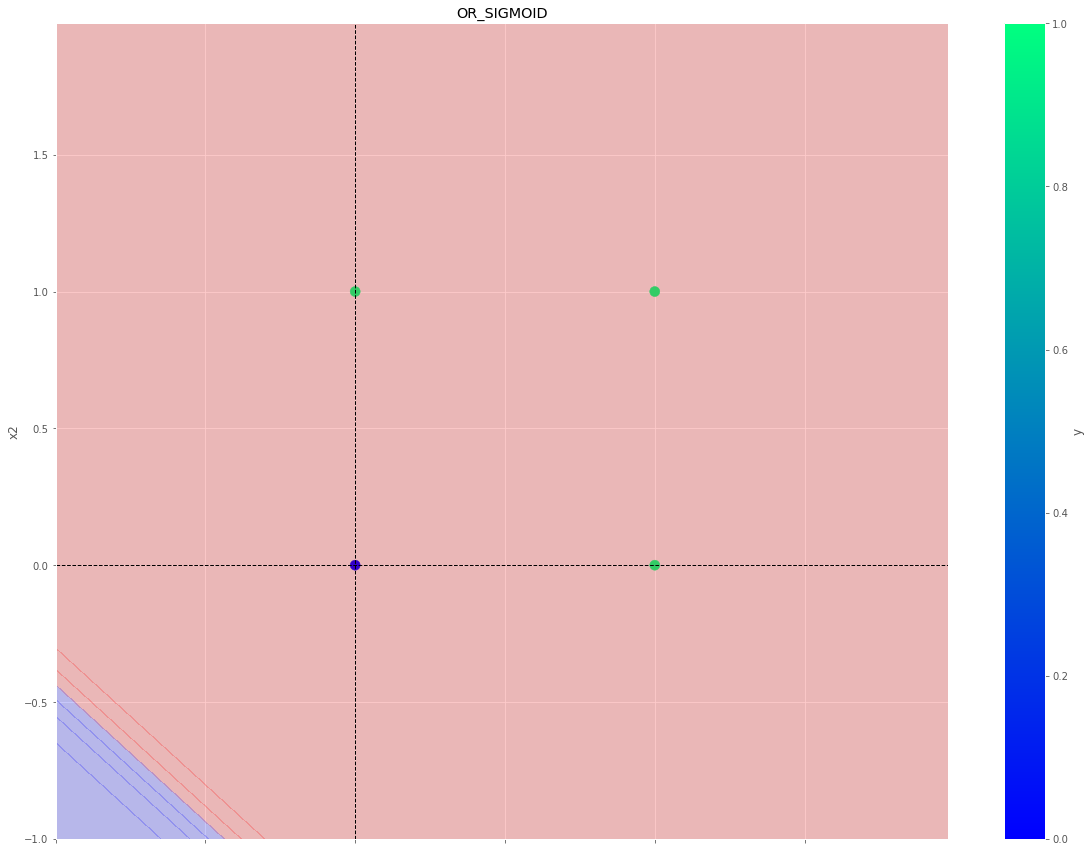

**************************************************************************************************************
                                               OR_SIGMOID Ended                                               
************************************************************************************************************************
   x1  x2  y
0   0   0  0
1   0   1  0
2   1   0  0
3   1   1  1

X with bias:
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]

initial weights before training:
[-5.99630486e-05  1.45291042e-04 -7.79505324e-05]
------------------------------
# epoch: 1
------------------------------
Predicted value after forward pass:
[0.49998051 0.49994419 0.4999955  0.49995918]

Error:
0   -0.499981
1   -0.499944
2   -0.499996
3    0.500041
Name: y, dtype: float64

Updated weights after epoch:
1/20:
[-4.63680979e-05  1.74280050e-04  2.99885865e-01]
##################################################
------------------------------
# epoch: 2
-----------

<Figure size 432x288 with 0 Axes>

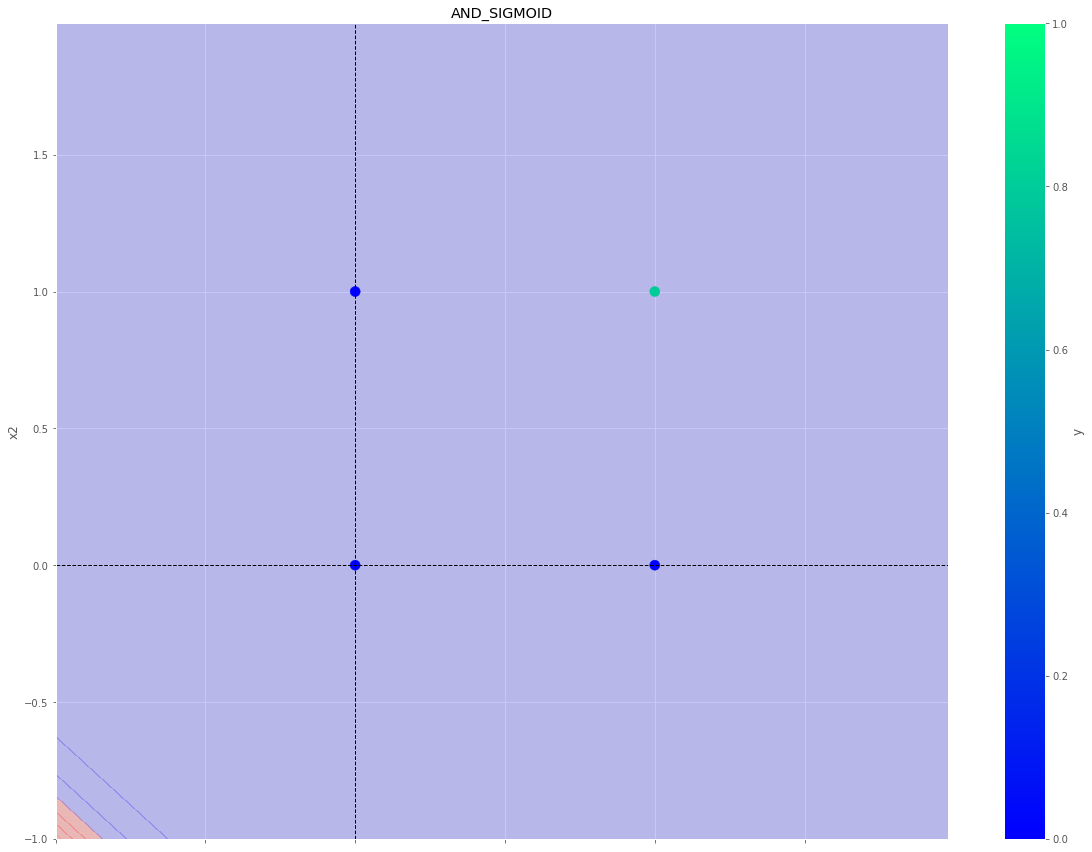

**************************************************************************************************************
                                              AND_SIGMOID Ended                                               
************************************************************************************************************************
   x1  x2  y
0   0   0  0
1   0   1  1
2   1   0  1
3   1   1  0

X with bias:
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]

initial weights before training:
[ 1.40682045e-05  1.58962098e-04 -7.41873451e-05]
------------------------------
# epoch: 1
------------------------------
Predicted value after forward pass:
[0.49998145 0.49994171 0.49997794 0.4999382 ]

Error:
0   -0.499981
1    0.500058
2    0.500022
3   -0.499938
Name: y, dtype: float64

Updated weights after epoch:
1/20:
[ 3.92286943e-05  1.94989630e-04 -1.22398094e-04]
##################################################
------------------------------
# epoch: 2
-----------

<Figure size 432x288 with 0 Axes>

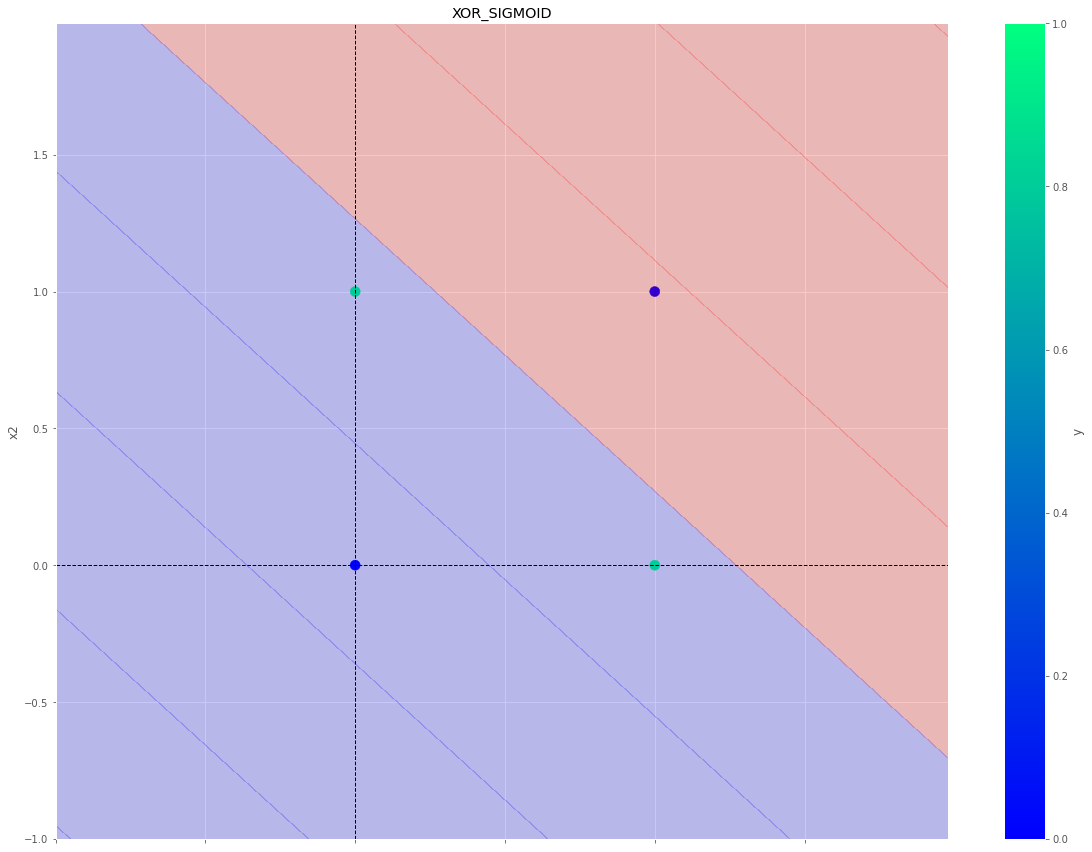

**************************************************************************************************************
                                              XOR_SIGMOID Ended                                               
************************************************************************************************************************
   x1  x2  y
0   0   0  1
1   0   1  1
2   1   0  1
3   1   1  0

X with bias:
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]

initial weights before training:
[-5.38836435e-05  4.55820414e-05 -1.58284009e-05]
------------------------------
# epoch: 1
------------------------------
Predicted value after forward pass:
[0.49999604 0.49998465 0.50000951 0.49999812]

Error:
0    0.500004
1    0.500015
2    0.499990
3   -0.499998
Name: y, dtype: float64

Updated weights after epoch:
1/20:
[-5.61732768e-05  5.07523344e-05 -3.00019332e-01]
##################################################
------------------------------
# epoch: 2
-----------

<Figure size 432x288 with 0 Axes>

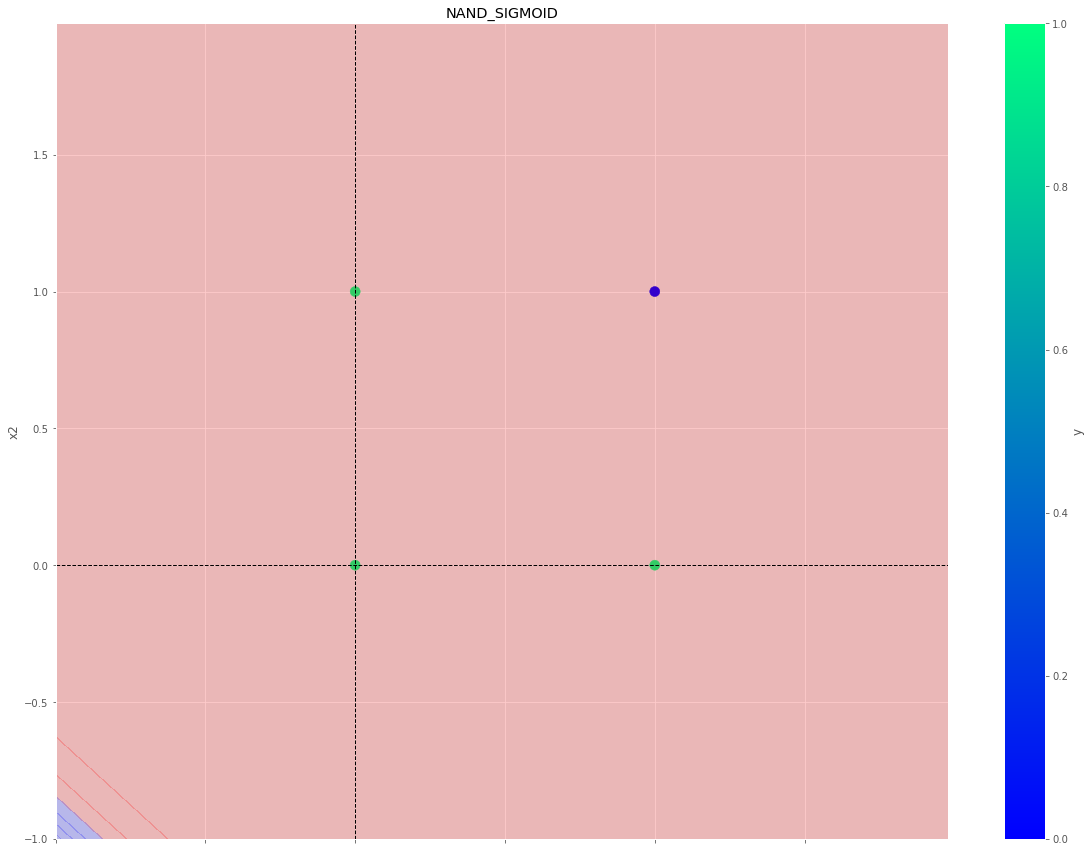

**************************************************************************************************************
                                              NAND_SIGMOID Ended                                              
************************************************************************************************************************
   x1  x2  y
0   0   0  0
1   0   1  1
2   1   0  1
3   1   1  1

X with bias:
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]

initial weights before training:
[9.54639857e-05 2.17723370e-04 1.62556008e-04]
------------------------------
# epoch: 1
------------------------------
Predicted value after forward pass:
[-1.62556006e-04  5.51673624e-05 -6.70920220e-05  1.50631347e-04]

Error:
0    0.000163
1    0.999945
2    1.000067
3    0.999849
Name: y, dtype: float64

Updated weights after epoch:
1/20:
[ 0.6000704   0.60015598 -0.8998446 ]
##################################################
------------------------------
# epoch: 2
------

<Figure size 432x288 with 0 Axes>

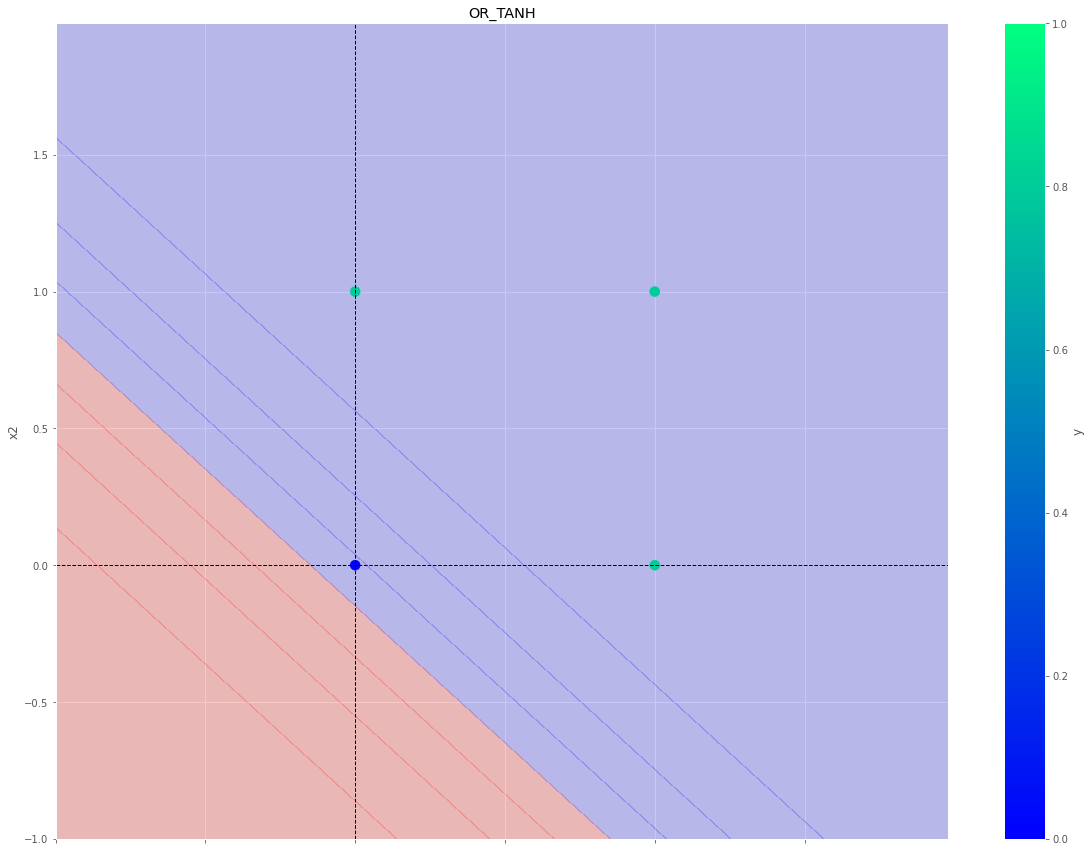

**************************************************************************************************************
                                                OR_TANH Ended                                                 
************************************************************************************************************************
   x1  x2  y
0   0   0  0
1   0   1  0
2   1   0  0
3   1   1  1

X with bias:
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]

initial weights before training:
[-1.51234325e-04  1.76538994e-05 -5.91980347e-05]
------------------------------
# epoch: 1
------------------------------
Predicted value after forward pass:
[ 5.91980346e-05  7.68519340e-05 -9.20362897e-05 -7.43823904e-05]

Error:
0   -0.000059
1   -0.000077
2    0.000092
3    1.000074
Name: y, dtype: float64

Updated weights after epoch:
1/20:
[ 0.29989869  0.30001691 -0.30006831]
##################################################
------------------------------
# epoch: 2
---

<Figure size 432x288 with 0 Axes>

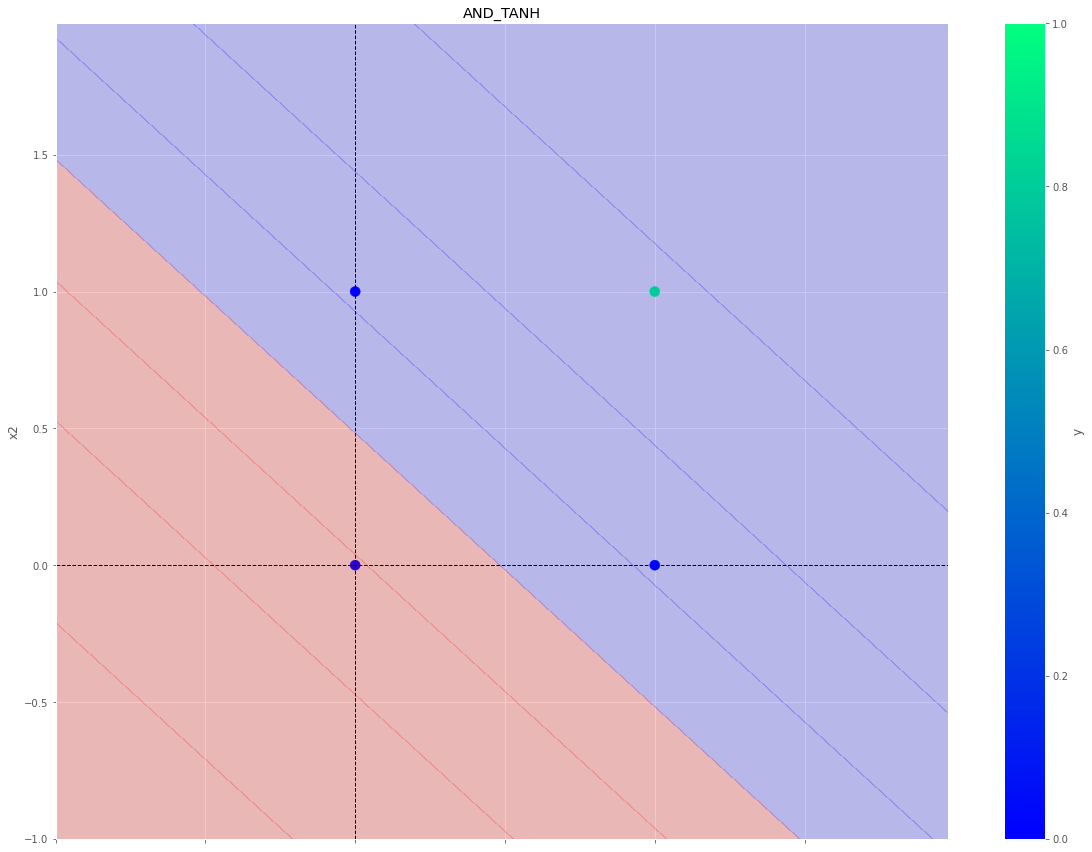

**************************************************************************************************************
                                                AND_TANH Ended                                                
************************************************************************************************************************
   x1  x2  y
0   0   0  0
1   0   1  1
2   1   0  1
3   1   1  0

X with bias:
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]

initial weights before training:
[ 1.81642998e-04 -8.05594713e-05  1.13934978e-04]
------------------------------
# epoch: 1
------------------------------
Predicted value after forward pass:
[-1.13934977e-04 -1.94494446e-04  6.77080199e-05 -1.28514513e-05]

Error:
0    0.000114
1    1.000194
2    0.999932
3    0.000013
Name: y, dtype: float64

Updated weights after epoch:
1/20:
[ 0.30016519  0.29998164 -0.59996214]
##################################################
------------------------------
# epoch: 2
---

<Figure size 432x288 with 0 Axes>

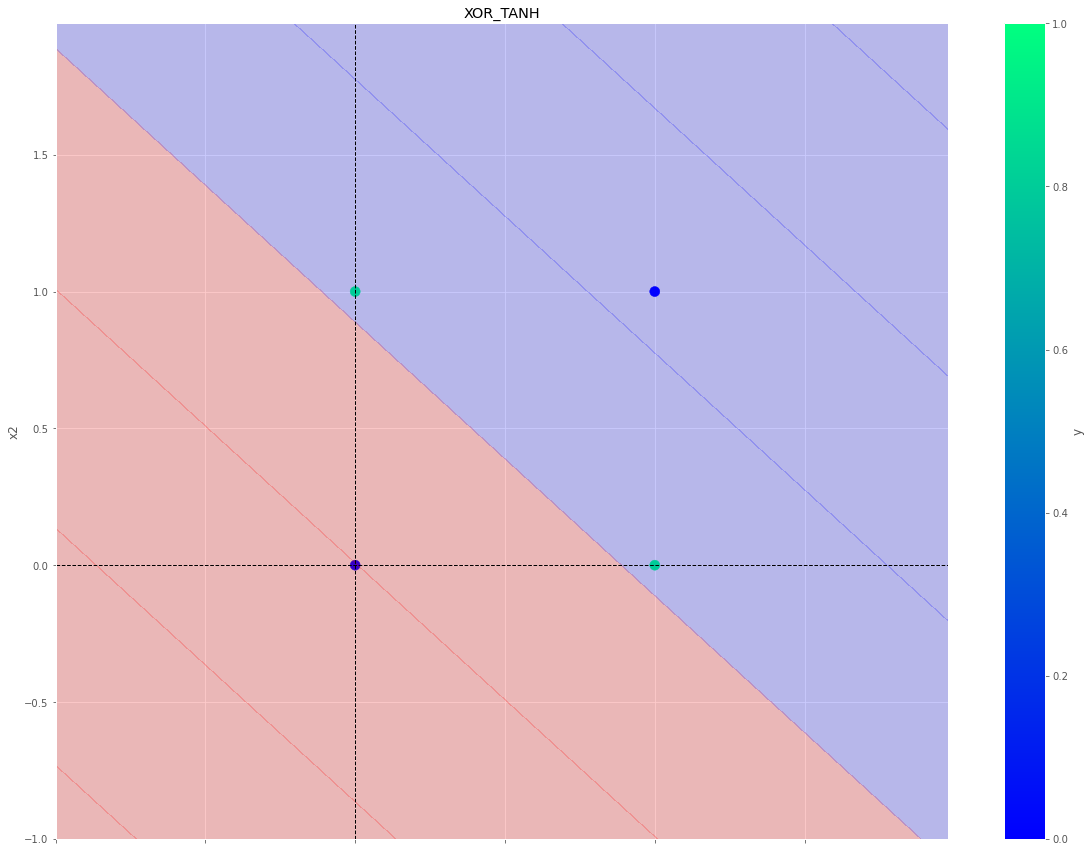

**************************************************************************************************************
                                                XOR_TANH Ended                                                
************************************************************************************************************************
   x1  x2  y
0   0   0  1
1   0   1  1
2   1   0  1
3   1   1  0

X with bias:
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]

initial weights before training:
[3.22282516e-06 1.79205873e-05 1.51145165e-04]
------------------------------
# epoch: 1
------------------------------
Predicted value after forward pass:
[-0.00015115 -0.00013322 -0.00014792 -0.00013   ]

Error:
0    1.000151
1    1.000133
2    1.000148
3    0.000130
Name: y, dtype: float64

Updated weights after epoch:
1/20:
[ 0.3000866   0.30009689 -0.90001754]
##################################################
------------------------------
# epoch: 2
----------------------

<Figure size 432x288 with 0 Axes>

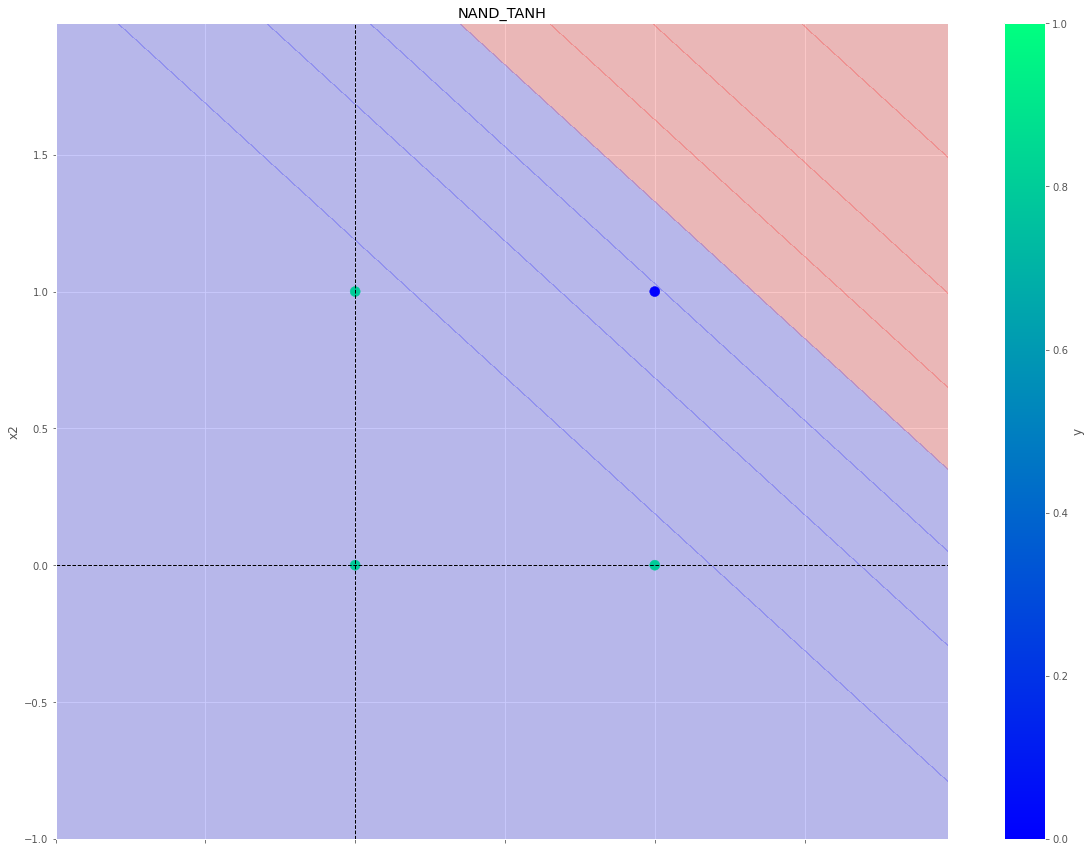

**************************************************************************************************************
                                               NAND_TANH Ended                                                
************************************************************************************************************************
   x1  x2  y
0   0   0  0
1   0   1  1
2   1   0  1
3   1   1  1

X with bias:
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]

initial weights before training:
[ 1.02731257e-04 -5.97910395e-05  9.73718100e-05]
------------------------------
# epoch: 1
------------------------------
Predicted value after forward pass:
[-1.94734139e-05 -3.14301000e-05  5.35944715e-06 -1.08860222e-05]

Error:
0    0.000019
1    1.000031
2    0.999995
3    1.000011
Name: y, dtype: float64

Updated weights after epoch:
1/20:
[ 0.60010439  0.5999529  -0.89991956]
##################################################
------------------------------
# epoch: 2
---

<Figure size 432x288 with 0 Axes>

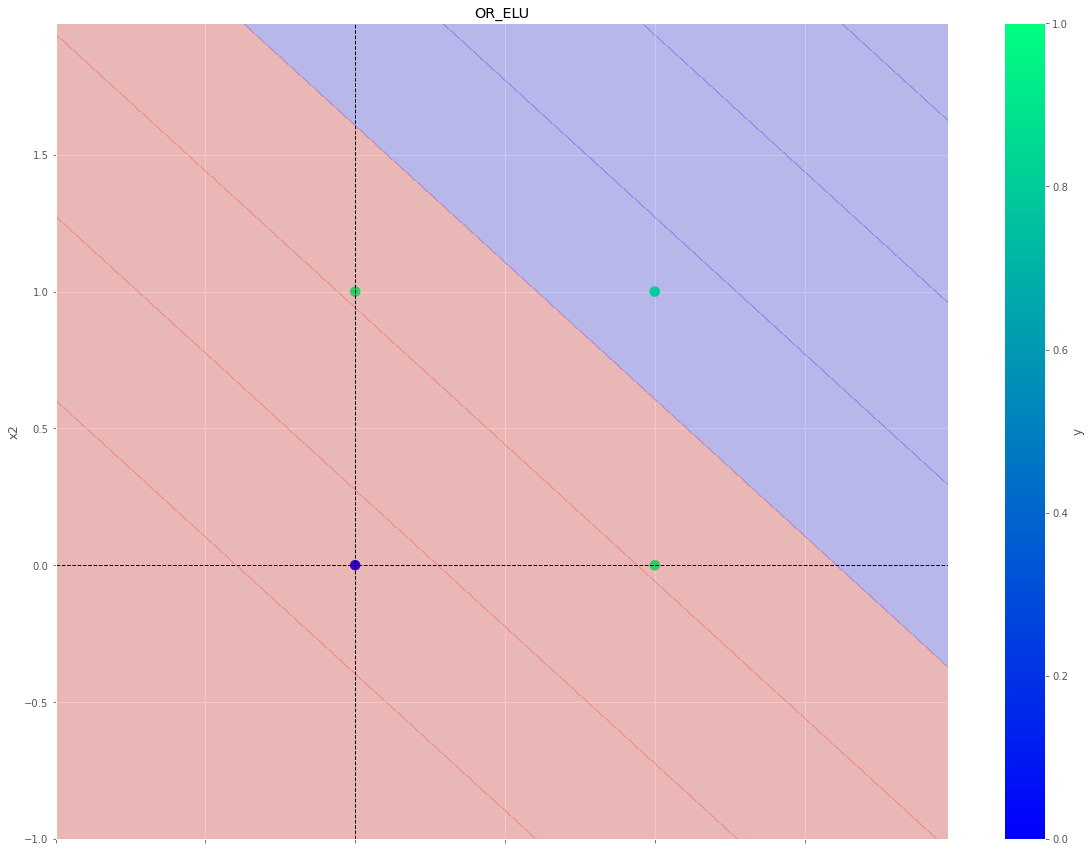

**************************************************************************************************************
                                                 OR_ELU Ended                                                 
************************************************************************************************************************
   x1  x2  y
0   0   0  0
1   0   1  0
2   1   0  0
3   1   1  1

X with bias:
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]

initial weights before training:
[-2.89049330e-05  5.73830566e-05 -2.71830195e-05]
------------------------------
# epoch: 1
------------------------------
Predicted value after forward pass:
[ 2.71830195e-05  8.45660762e-05 -3.44382393e-07  5.56611432e-05]

Error:
0   -2.718302e-05
1   -8.456608e-05
2    3.443824e-07
3    9.999443e-01
Name: y, dtype: float64

Updated weights after epoch:
1/20:
[ 0.2999545   0.30001531 -0.29997706]
##################################################
-----------------------------

<Figure size 432x288 with 0 Axes>

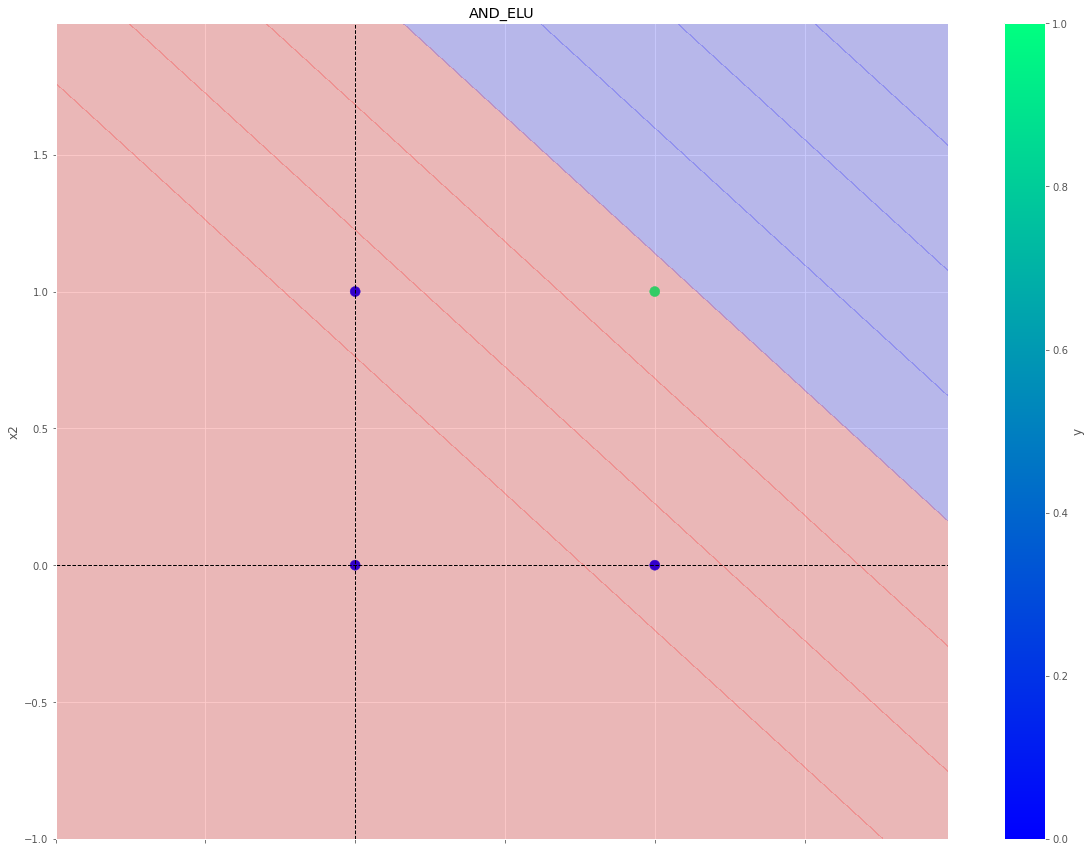

**************************************************************************************************************
                                                AND_ELU Ended                                                 
************************************************************************************************************************
   x1  x2  y
0   0   0  0
1   0   1  1
2   1   0  1
3   1   1  0

X with bias:
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]

initial weights before training:
[-1.39724400e-04 -4.72723001e-05  8.31996240e-05]
------------------------------
# epoch: 1
------------------------------
Predicted value after forward pass:
[-1.66392326e-05 -2.60926826e-05 -4.45798356e-05 -5.40319648e-05]

Error:
0    0.000017
1    1.000026
2    1.000045
3    0.000054
Name: y, dtype: float64

Updated weights after epoch:
1/20:
[ 0.29988986  0.29997677 -0.5999592 ]
##################################################
------------------------------
# epoch: 2
---

<Figure size 432x288 with 0 Axes>

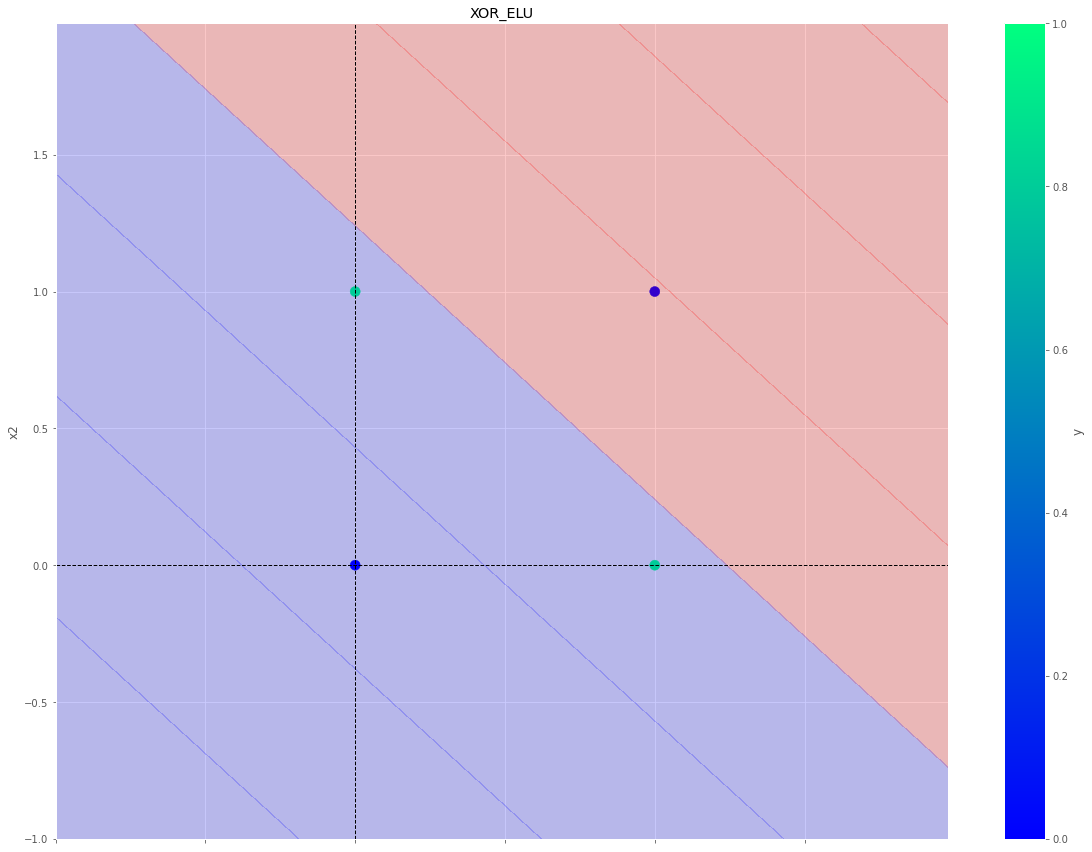

**************************************************************************************************************
                                                XOR_ELU Ended                                                 
************************************************************************************************************************
   x1  x2  y
0   0   0  1
1   0   1  1
2   1   0  1
3   1   1  0

X with bias:
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]

initial weights before training:
[ 7.01168635e-05 -1.07984352e-04  7.56471417e-05]
------------------------------
# epoch: 1
------------------------------
Predicted value after forward pass:
[-1.51288561e-05 -3.67229269e-05 -1.10605258e-06 -2.27016375e-05]

Error:
0    1.000015
1    1.000037
2    1.000001
3    0.000023
Name: y, dtype: float64

Updated weights after epoch:
1/20:
[ 0.30007726  0.29990984 -0.89994705]
##################################################
------------------------------
# epoch: 2
---

<Figure size 432x288 with 0 Axes>

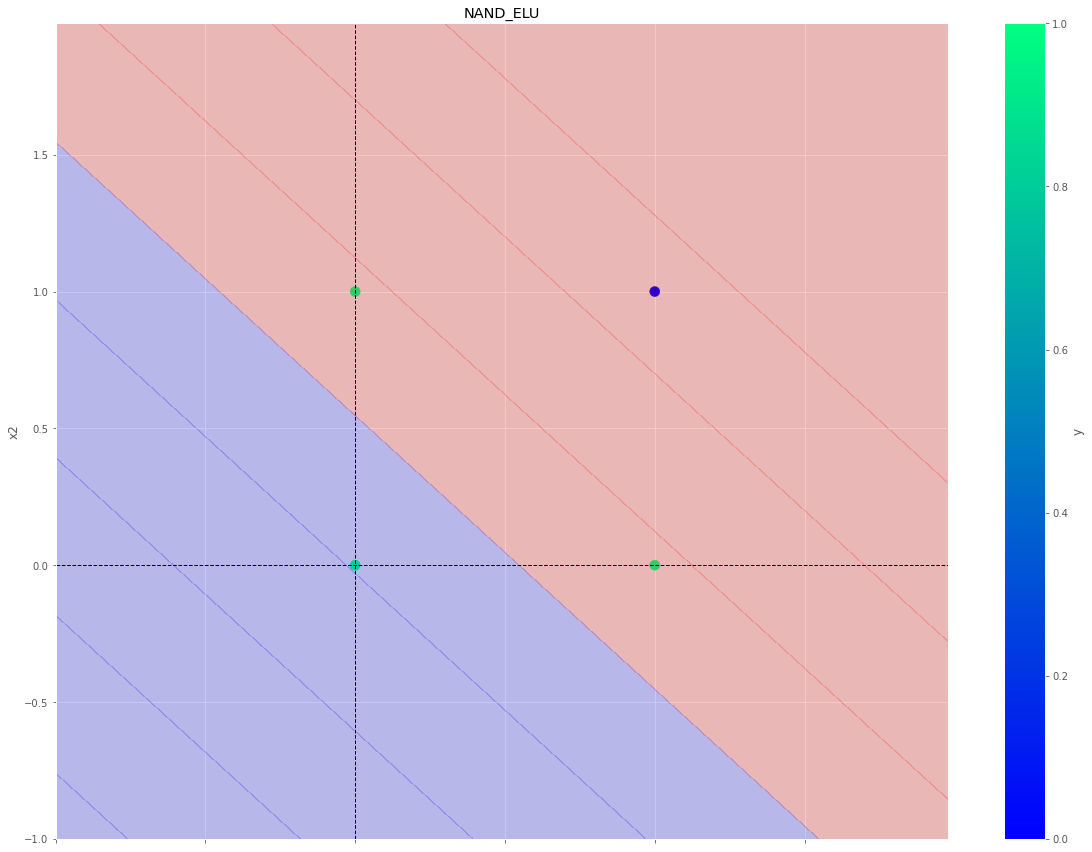

**************************************************************************************************************
                                                NAND_ELU Ended                                                
************************************************************************************************************************
   x1  x2  y
0   0   0  0
1   0   1  1
2   1   0  1
3   1   1  1

X with bias:
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]

initial weights before training:
[ 2.09551202e-05  1.29808051e-04 -5.07564405e-05]
------------------------------
# epoch: 1
------------------------------
Predicted value after forward pass:
[2.53792478e-05 9.02952501e-05 3.58578315e-05 1.00776004e-04]

Error:
0   -0.000025
1    0.999910
2    0.999964
3    0.999899
Name: y, dtype: float64

Updated weights after epoch:
1/20:
[ 0.59997996  0.60007249 -0.89997506]
##################################################
------------------------------
# epoch: 2
-------

<Figure size 432x288 with 0 Axes>

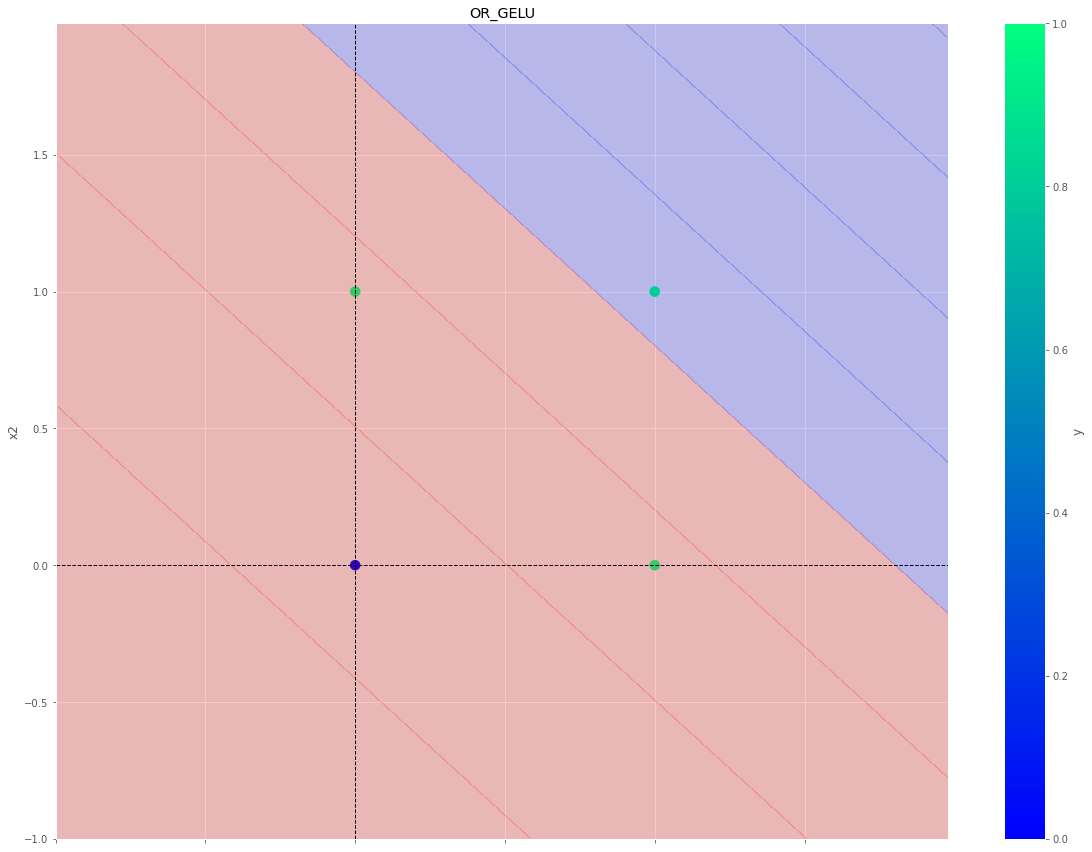

**************************************************************************************************************
                                                OR_GELU Ended                                                 
************************************************************************************************************************
   x1  x2  y
0   0   0  0
1   0   1  0
2   1   0  0
3   1   1  1

X with bias:
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]

initial weights before training:
[1.24836715e-04 7.59405204e-05 1.77649167e-04]
------------------------------
# epoch: 1
------------------------------
Predicted value after forward pass:
[-8.88119957e-05 -5.08501971e-05 -2.64051136e-05  1.15642474e-05]

Error:
0    0.000089
1    0.000051
2    0.000026
3    0.999988
Name: y, dtype: float64

Updated weights after epoch:
1/20:
[ 0.30012929  0.30008773 -0.2998687 ]
##################################################
------------------------------
# epoch: 2
------

<Figure size 432x288 with 0 Axes>

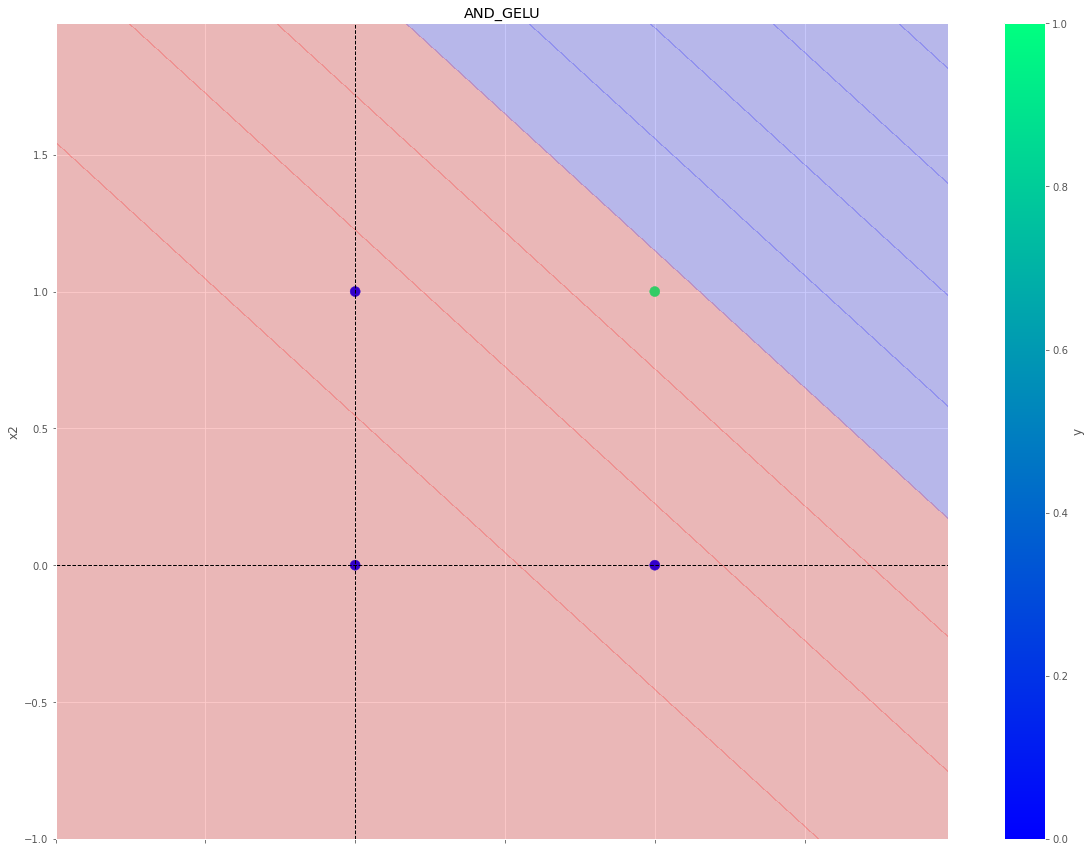

**************************************************************************************************************
                                                AND_GELU Ended                                                
************************************************************************************************************************
   x1  x2  y
0   0   0  0
1   0   1  1
2   1   0  1
3   1   1  0

X with bias:
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]

initial weights before training:
[-8.07235163e-05 -5.35330242e-05  2.21066534e-04]
------------------------------
# epoch: 1
------------------------------
Predicted value after forward pass:
[-0.00011051 -0.00013727 -0.00015086 -0.00017761]

Error:
0    0.000111
1    1.000137
2    1.000151
3    0.000178
Name: y, dtype: float64

Updated weights after epoch:
1/20:
[ 0.30001782  0.30004093 -0.59995181]
##################################################
------------------------------
# epoch: 2
-------------------

<Figure size 432x288 with 0 Axes>

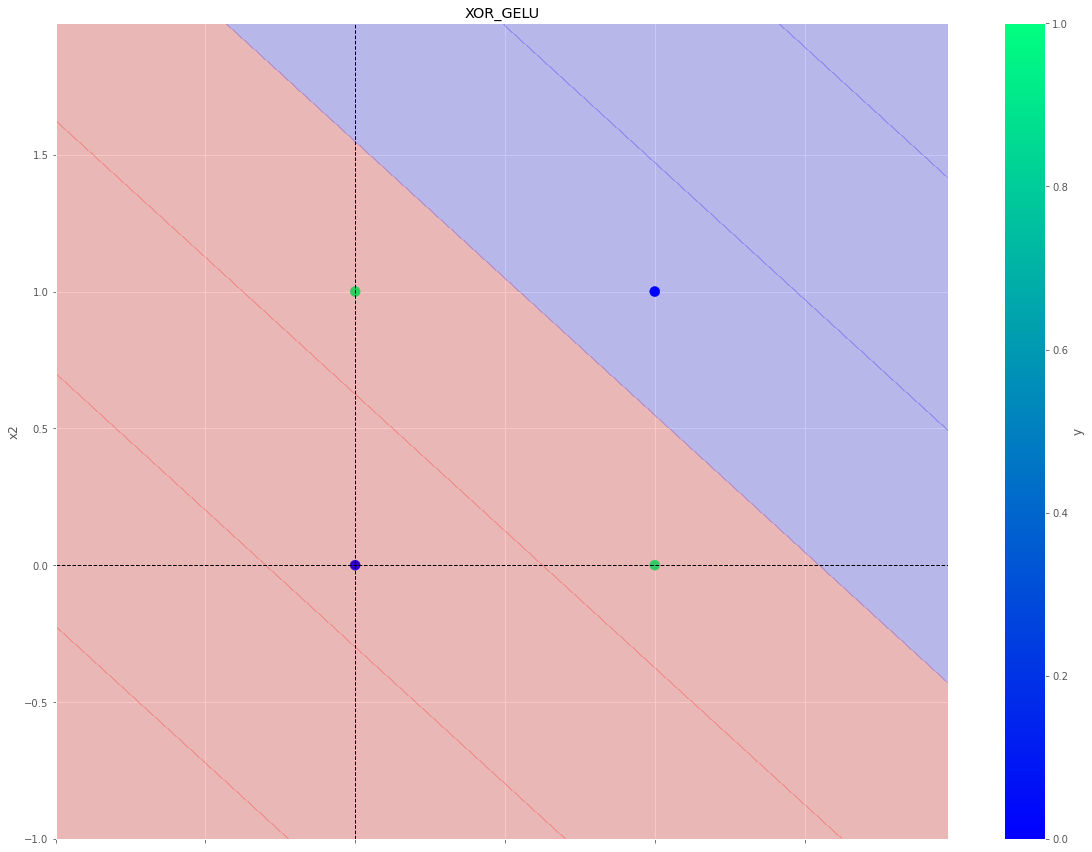

**************************************************************************************************************
                                                XOR_GELU Ended                                                
************************************************************************************************************************
   x1  x2  y
0   0   0  1
1   0   1  1
2   1   0  1
3   1   1  0

X with bias:
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]

initial weights before training:
[-0.00013235  0.0001007  -0.00022434]
------------------------------
# epoch: 1
------------------------------
Predicted value after forward pass:
[1.12192402e-04 1.62565210e-04 4.59989247e-05 9.63611011e-05]

Error:
0    0.999888
1    0.999837
2    0.999954
3   -0.000096
Name: y, dtype: float64

Updated weights after epoch:
1/20:
[ 0.29982494  0.30002302 -0.90009921]
##################################################
------------------------------
# epoch: 2
-------------------

<Figure size 432x288 with 0 Axes>

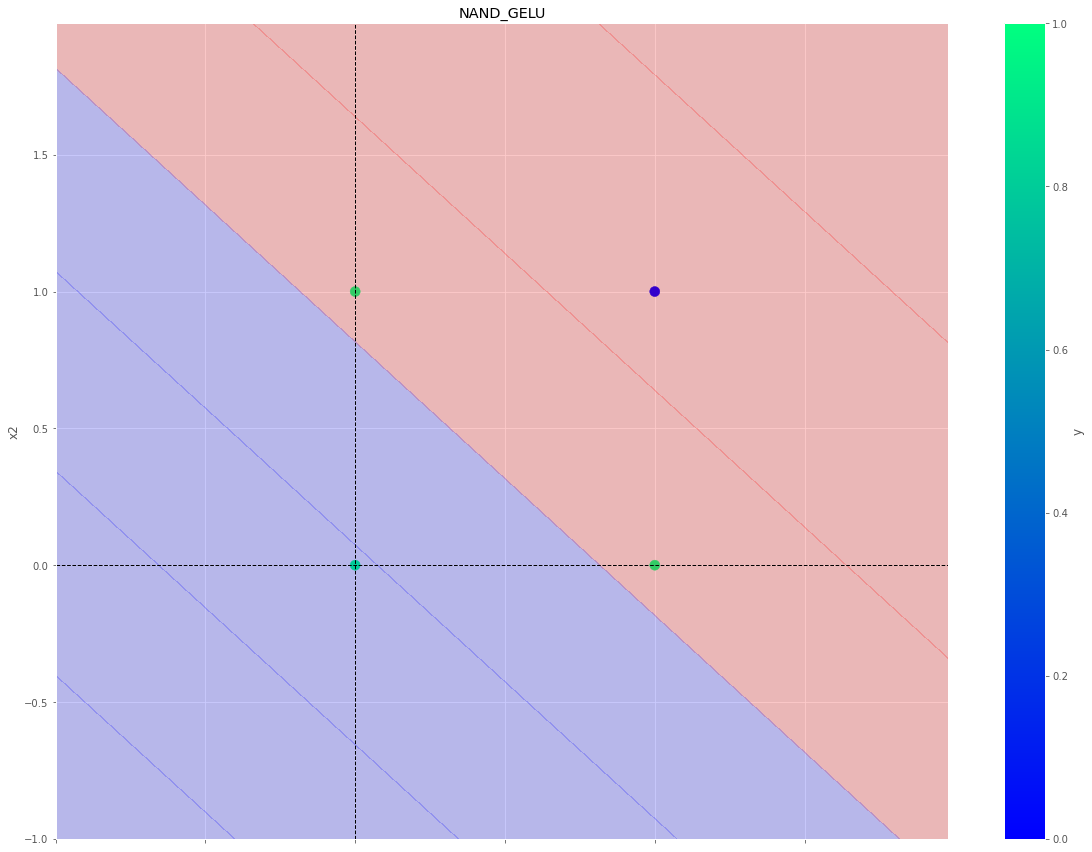

**************************************************************************************************************
                                               NAND_GELU Ended                                                
************************************************************************************************************************
   x1  x2  y
0   0   0  0
1   0   1  1
2   1   0  1
3   1   1  1

X with bias:
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]

initial weights before training:
[-1.49270770e-04  5.05187332e-06  9.82014296e-06]
------------------------------
# epoch: 1
------------------------------
Predicted value after forward pass:
[-4.91004737e-06 -2.38412914e-06 -7.95391291e-05 -7.70135879e-05]

Error:
0    0.000005
1    1.000002
2    1.000080
3    1.000077
Name: y, dtype: float64

Updated weights after epoch:
1/20:
[ 0.5998977   0.60002887 -0.90003933]
##################################################
------------------------------
# epoch: 2
---

<Figure size 432x288 with 0 Axes>

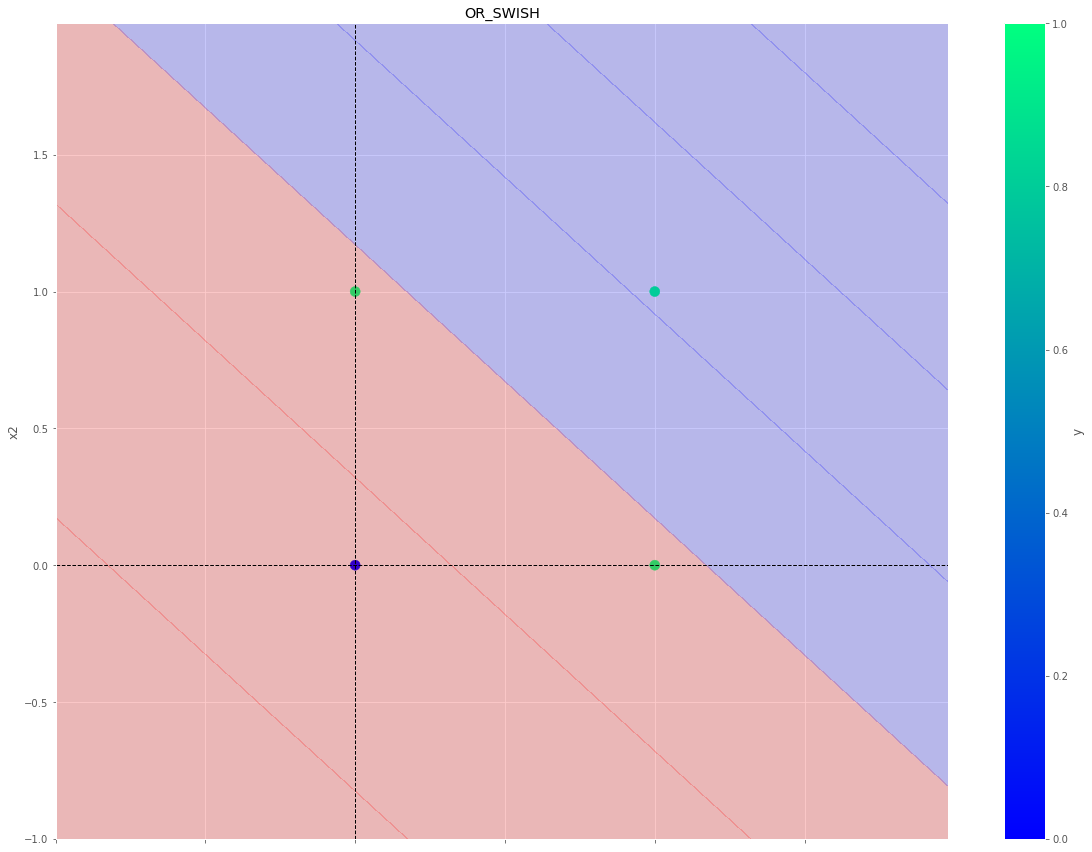

**************************************************************************************************************
                                                OR_SWISH Ended                                                
************************************************************************************************************************
   x1  x2  y
0   0   0  0
1   0   1  0
2   1   0  0
3   1   1  1

X with bias:
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]

initial weights before training:
[6.27554489e-05 4.20174188e-05 5.27451308e-05]
------------------------------
# epoch: 1
------------------------------
Predicted value after forward pass:
[-2.63718699e-05 -5.36382726e-06  5.00518408e-06  2.60145451e-05]

Error:
0    0.000026
1    0.000005
2   -0.000005
3    0.999974
Name: y, dtype: float64

Updated weights after epoch:
1/20:
[ 0.30005345  0.30003582 -0.29994747]
##################################################
------------------------------
# epoch: 2
------

<Figure size 432x288 with 0 Axes>

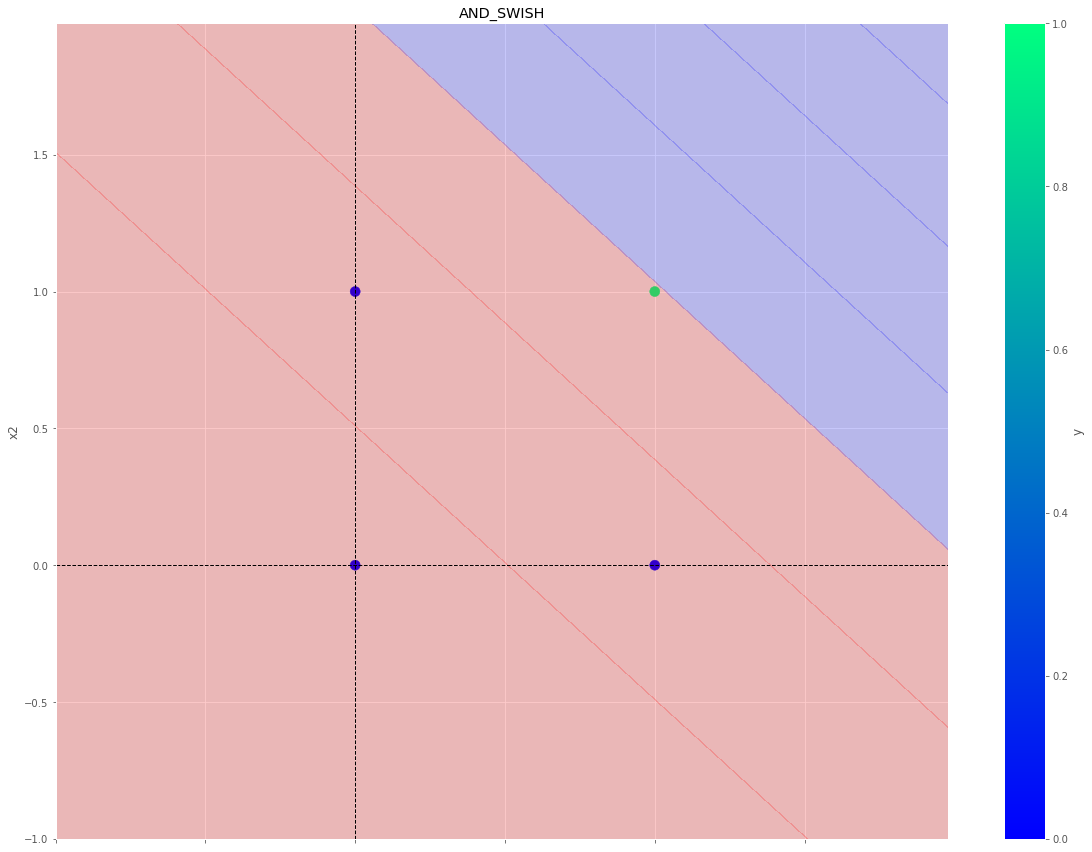

**************************************************************************************************************
                                               AND_SWISH Ended                                                
************************************************************************************************************************
   x1  x2  y
0   0   0  0
1   0   1  1
2   1   0  1
3   1   1  0

X with bias:
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]

initial weights before training:
[-3.95463675e-05  1.22883166e-04  1.87519971e-04]
------------------------------
# epoch: 1
------------------------------
Predicted value after forward pass:
[-9.37511944e-05 -3.23173577e-05 -1.13520279e-04 -5.20888724e-05]

Error:
0    0.000094
1    1.000032
2    1.000114
3    0.000052
Name: y, dtype: float64

Updated weights after epoch:
1/20:
[ 0.30001014  0.30014821 -0.59989998]
##################################################
------------------------------
# epoch: 2
---

<Figure size 432x288 with 0 Axes>

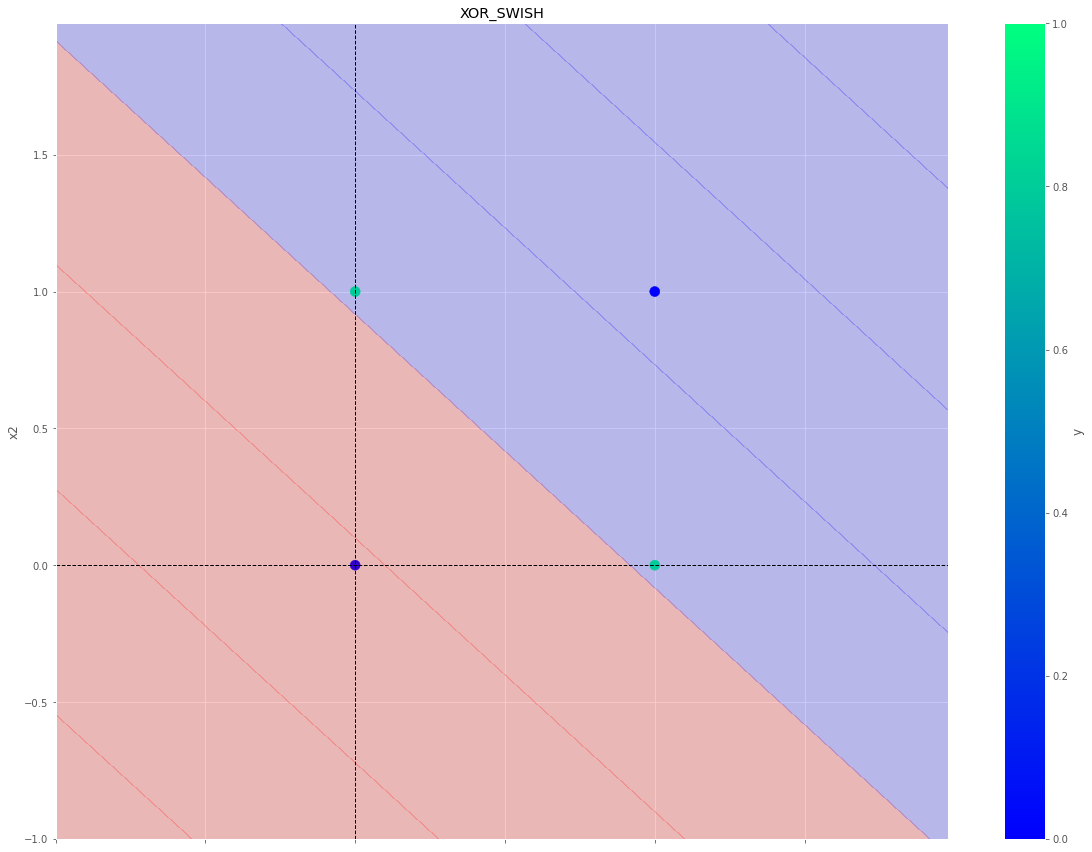

**************************************************************************************************************
                                               XOR_SWISH Ended                                                
************************************************************************************************************************
   x1  x2  y
0   0   0  1
1   0   1  1
2   1   0  1
3   1   1  0

X with bias:
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]

initial weights before training:
[ 2.64804711e-04  2.76655172e-05 -5.15409431e-05]
------------------------------
# epoch: 1
------------------------------
Predicted value after forward pass:
[2.57711357e-05 3.96047986e-05 1.58197846e-04 1.72035172e-04]

Error:
0    0.999974
1    0.999960
2    0.999842
3   -0.000172
Name: y, dtype: float64

Updated weights after epoch:
1/20:
[ 0.30016573  0.29996417 -0.89993286]
##################################################
------------------------------
# epoch: 2
-------

<Figure size 432x288 with 0 Axes>

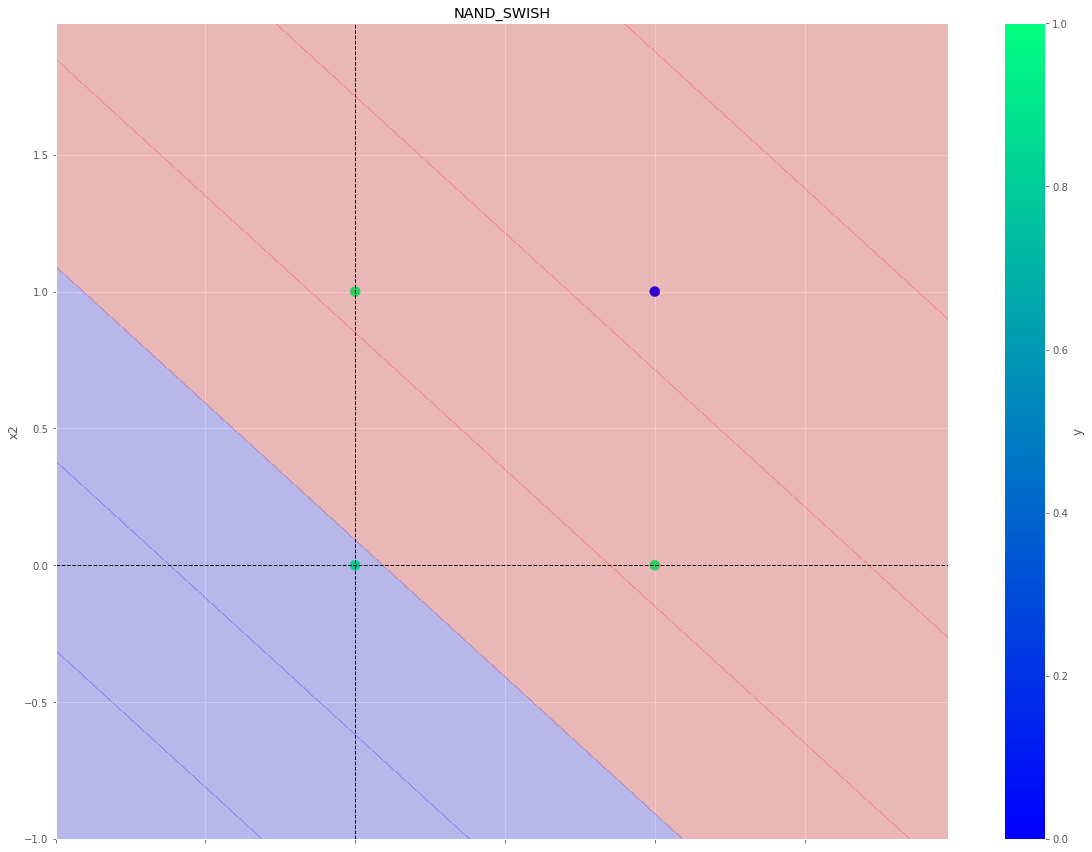

**************************************************************************************************************
                                               NAND_SWISH Ended                                               
************************************************************************************************************************


<Figure size 432x288 with 0 Axes>

In [19]:
if __name__=='__main__':
    OR = {
        'x1': [0, 0, 1, 1],
        'x2': [0, 1, 0, 1],
        'y': [0, 1, 1, 1]
    }
    
    AND = {
        "x1": [0,0,1,1],
        "x2": [0,1,0,1],
        "y": [0,0,0,1],
    }
    
    XOR = {
        "x1": [0,0,1,1],
        "x2": [0,1,0,1],
        "y": [0,1,1,0],
    }
    
    NAND = {
        "x1": [0,0,1,1],
        "x2": [0,1,0,1],
        "y": [1,1,1,0],
    }
    
    data_lst = {'or':OR, 'and': AND, 'xor': XOR, 'nand': NAND}
    funxns = ['step', 'signum', 'linear', 'relu', 'sigmoid', 'tanh', 'elu', 'gelu', 'swish']

    ETA = 0.3 # 0 to 1
    EPOCHS = 20
    
    for funxn in funxns:
        for k,v in data_lst.items():
            pltTitle = k+'_'+funxn
            pltTitle = pltTitle.upper()
            main(data = v, eta = ETA, epochs = EPOCHS,fn=funxn, filename = pltTitle+'.model', plotFilename=pltTitle+'.png', plotTitle=pltTitle)
            time.sleep(5)
            print('*****'*22, f'{pltTitle} Ended'.center(110, ' '), '******'*20, sep = '\n')

[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

step:
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1]

signum:
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0  1  1  1  1  1  1  1  1  1  1]

linear:
[-10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7
   8   9  10]

ReLU:
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  2.  3.  4.  5.  6.  7.
  8.  9. 10.]

sigmoid:
[9.99954602e-01 9.99876605e-01 9.99664650e-01 9.99088949e-01
 9.97527377e-01 9.93307149e-01 9.82013790e-01 9.52574127e-01
 8.80797078e-01 7.31058579e-01 5.00000000e-01 2.68941421e-01
 1.19202922e-01 4.74258732e-02 1.79862100e-02 6.69285092e-03
 2.47262316e-03 9.11051194e-04 3.35350130e-04 1.23394576e-04
 4.53978687e-05]

tanh:
[-1.         -0.99999997 -0.99999977 -0.99999834 -0.99998771 -0.9999092
 -0.9993293  -0.99505475 -0.96402758 -0.76159416  0.          0.76159416
  0.96402758  0.99505475  0.9993293   0.9999092   0.99998771  0.99999834
  0.99999977  0.99999997  1.        ]

ELU:
[-1.9999

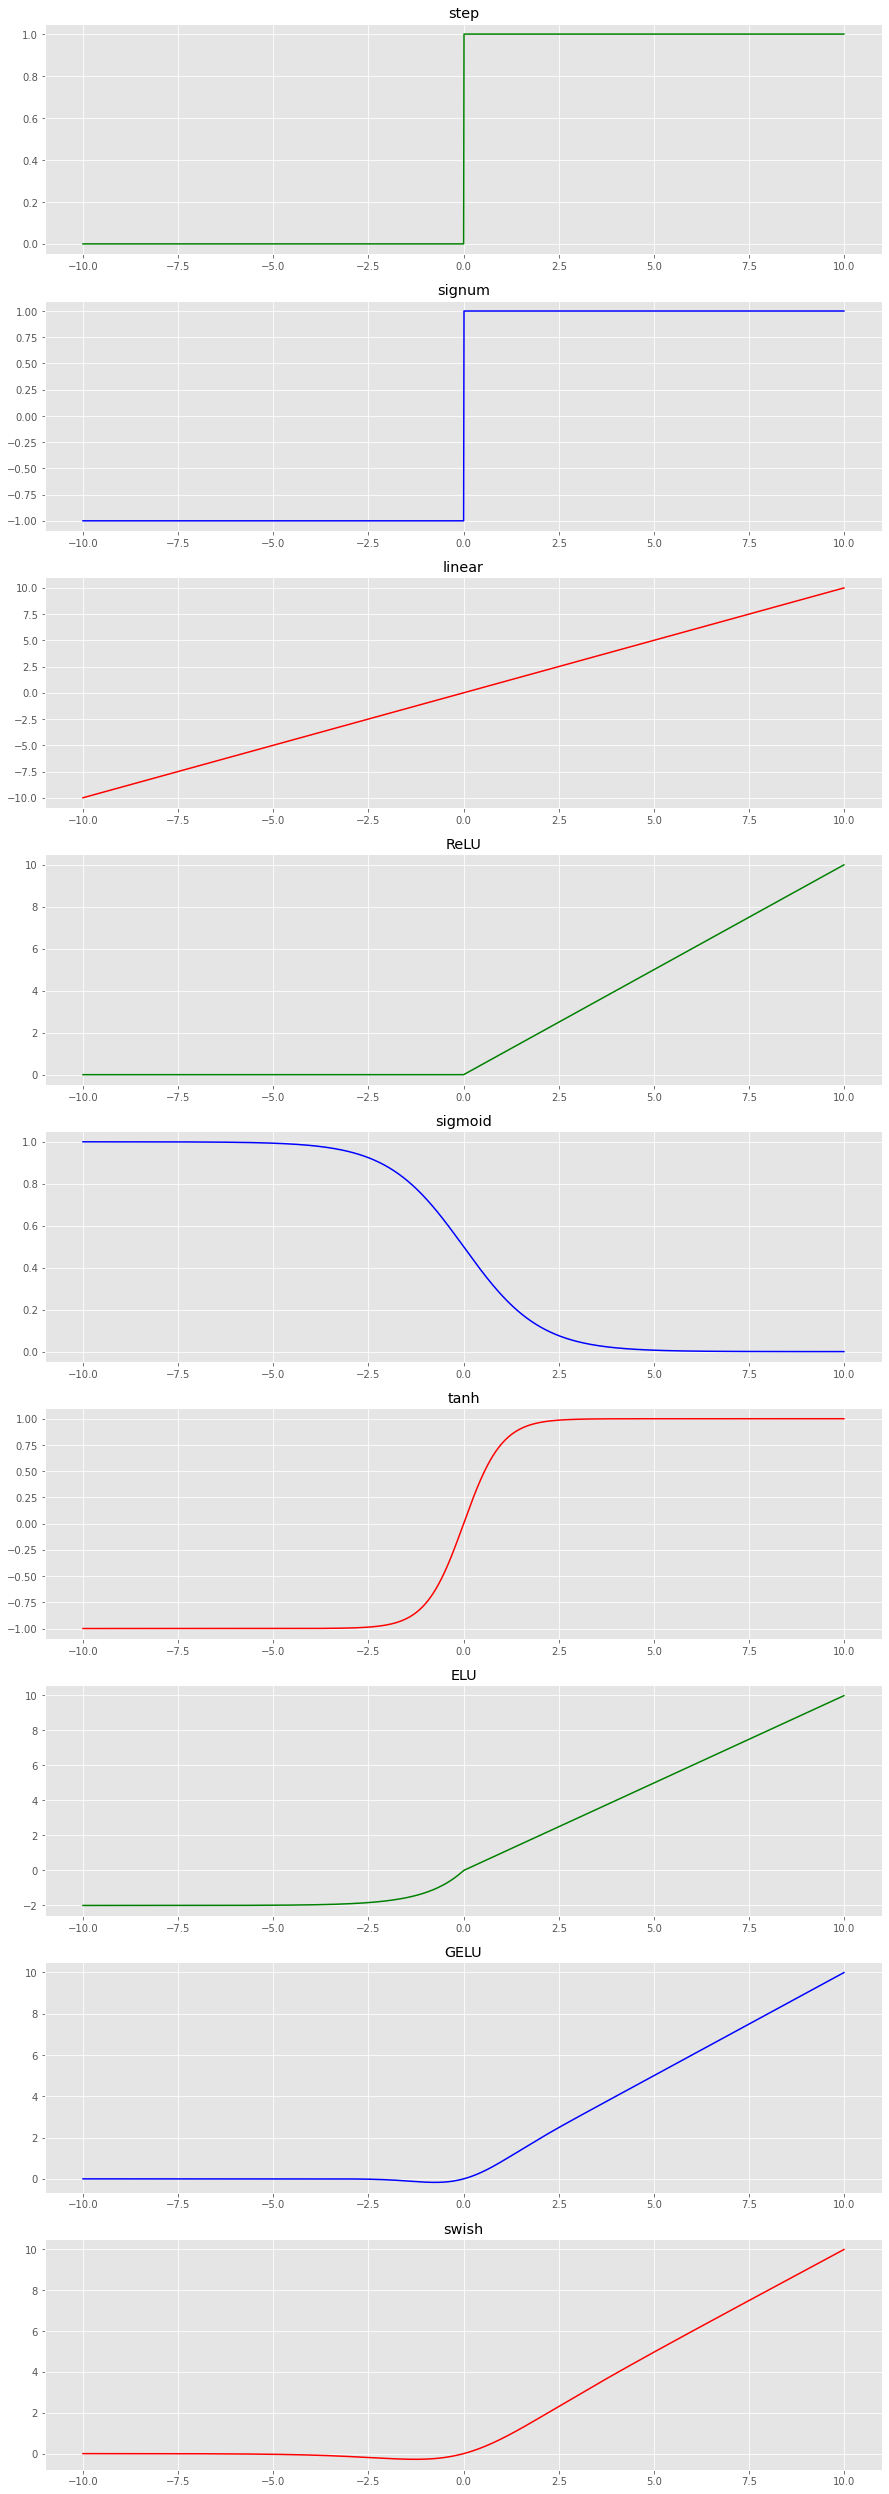

In [8]:

step = lambda x: np.where(x>=0,1,0)
signum = lambda x: -1 if x < 0 else 0 if x == 0 else 1
linear = lambda x: x
ReLU = lambda x: max(0.0, x)
sigmoid = lambda x: 1/(1 + np.exp(x))
tan_h = lambda x: (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))
ELU = lambda x, alpha = 1.0: x if x >= 0 else alpha*(np.exp(x) - 1)
GELU = lambda x: 0.5*x*(1 + np.tanh((7/11)**.5 * (x + (0.044715 * x**3))))
swish = lambda x:  x/(1 + np.exp(-x))

funcs = [step, signum, linear, ReLU, sigmoid, tan_h, ELU, GELU, swish]
func_str = ['step', 'signum', 'linear', 'ReLU', 'sigmoid', 'tanh', 'ELU', 'GELU', 'swish']

inputs = [i for i in range(-10, 11)]
dict_out = {}

plt.figure(figsize=(15,45), facecolor='white')
colors = ['red', 'green', 'blue']

for i,func in enumerate(funcs):
    vf = np.vectorize(func)
    outputs = vf(inputs) if func != ELU else vf(inputs, 2)
    dict_out[func_str[i]] = outputs
    
    # Plot
    X_grid = np.arange(min(inputs), max(inputs), 0.01)
    X_grid = X_grid.reshape((len(X_grid), 1))
    ax = plt.subplot(9, 1, i+1)
    plt.plot(X_grid,vf(X_grid) if func != ELU else vf(X_grid, 2) , color = colors[(i+1)%3])
    plt.title(func_str[i])
    
print(inputs)
for i in dict_out.keys():
    print(f'\n{i}:\n{dict_out[i]}')
plt.show()

In [9]:
def neuralFunction(self, fn, alpha):
    self.step = lambda self, x: np.where(x>=0,1,0)
    self.signum = lambda self, x: -1 if x < 0 else 0 if x == 0 else 1
    self.linear = lambda self, x: x
    self.ReLU = lambda self, x: max(0.0, x)
    self.sigmoid = lambda self, x: 1/(1 + np.exp(x))
    self.tan_h = lambda self, x: (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))
    self.ELU = lambda self, x, alpha = 1.0: x if x >= 0 else alpha*(np.exp(x) - 1)
    self.GELU = lambda self, x: 0.5*x*(1 + np.tanh((7/11)**.5 * (x + (0.044715 * x**3))))
    self.swish = lambda self, x:  x/(1 + np.exp(-x))

    funcs = [self.step, self.signum, self.linear, self.ReLU, self.sigmoid, self.tan_h, self.ELU, self.GELU, self.swish]
    func_str = ['step', 'signum', 'linear', 'relu', 'sigmoid', 'tanh', 'elu', 'gelu', 'swish']
    func_dict = dict(zip(func_str, funcs))

    return (func_dict[fn], alpha)

    #print('Available Activation Functions are as follows: ','\n'.join(func_str))        
    #func = input('Select a suitable Activation Function from following: ').lower()
    #if func == 'elu':
    #    alpha = float(input('Enter alpha value for ELU:\n\u03B1 = '))
        